To-do list:

Train the data first
In the meantime, look at how to plot the flights on the map
Creating a pie chart or a bar chart relating to the condition of the plane and their delays

# Importing dataset

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings('always')

In [2]:
df1 = pd.read_csv('~/Desktop/Flight_Delays/newark_flights.csv')
df1.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [3]:
df1.head()

Unnamed: 0  YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER  \
0          37  2015      1    1            4      UA           1528   
1          45  2015      1    1            4      B6           1990   
2          49  2015      1    1            4      UA           1162   
3         110  2015      1    1            4      EV           4160   
4         125  2015      1    1            4      EV           4646   

  TAIL_NUMBER ORIGIN_AIRPORT DESTINATION_AIRPORT  ...  ARRIVAL_TIME  \
0      N76519            SJU                 EWR  ...         458.0   
1      N597JB            SJU                 EWR  ...         516.0   
2      N37293            BQN                 EWR  ...         605.0   
3      N11150            JAX                 EWR  ...         743.0   
4      N29917            CHS                 EWR  ...         742.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -11.0         0          0                  NaN               NaN   
1            4.0         0          0                  NaN               NaN   
2            6.0         0          0                  NaN               NaN   
3          -14.0         0          0                  NaN               NaN   
4            1.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 32 columns]

In [4]:
df1["DEPARTURE_DELAY"].head()

0     3.0
1   -14.0
2    -1.0
3    -9.0
4    -5.0
Name: DEPARTURE_DELAY, dtype: float64

In [5]:
airlines_names = pd.read_csv('~/Desktop/Flight_Delays/airlines.csv')
airlines_names

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

In [6]:
abbr_companies = airlines_names.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [8]:
# function that extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

# Creation of a dataframe with statitical infos on each airline:
global_stats = df1['DEPARTURE_DELAY'].groupby(df1['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

min     max    count        mean
AIRLINE                                   
OO        6.0   593.0      4.0  167.250000
MQ      -26.0   395.0    729.0   14.672154
AS      -21.0   764.0   1308.0    5.176606
VX      -17.0   644.0   3628.0    8.909041
US      -15.0   433.0   4039.0    8.383016
DL      -16.0  1119.0   9920.0   12.901512
WN      -13.0   421.0  10563.0   15.741929
AA      -29.0  1140.0  10604.0   11.578367
B6      -23.0   522.0  12452.0   14.382107
EV      -38.0   665.0  59617.0   10.152389
UA      -21.0  1314.0  84456.0   17.317858

In [9]:
# departure delay comparison for airlines
x = df1["DEPARTURE_DELAY"].groupby(df1["AIRLINE"]).mean().sort_values()

In [10]:
x.head()

AIRLINE
AS     5.176606
US     8.383016
VX     8.909041
EV    10.152389
AA    11.578367
Name: DEPARTURE_DELAY, dtype: float64

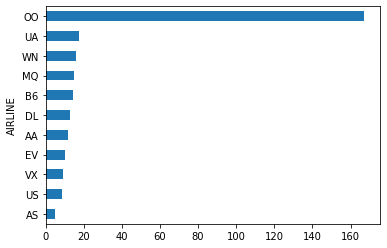

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

x.plot(kind='barh')

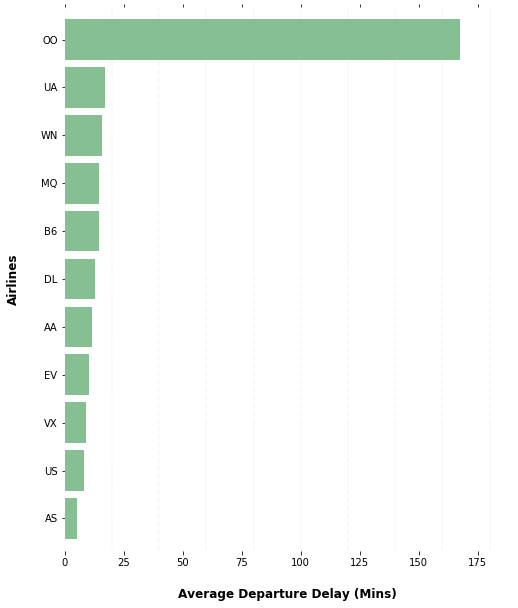

In [17]:
from matplotlib.ticker import StrMethodFormatter

ax = x.plot(kind='barh', figsize=(8,10), color='#86bf91', zorder=2, width=0.85)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", labelleft="on")

vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle="dashed", alpha=0.4, color="#eeeeee", zorder=1)
    
ax.set_xlabel("Average Departure Delay (Mins)", labelpad=20, weight="bold", size=12)

ax.set_ylabel("Airlines", labelpad=20, weight="bold", size=12)

ax.xaxis.set_major_formatter(StrMethodFormatter("{x:,g}"))

In [18]:
# arrival delay comparison for airlines
arrival_delay = df1["ARRIVAL_DELAY"].groupby(df1["AIRLINE"]).mean().sort_values()

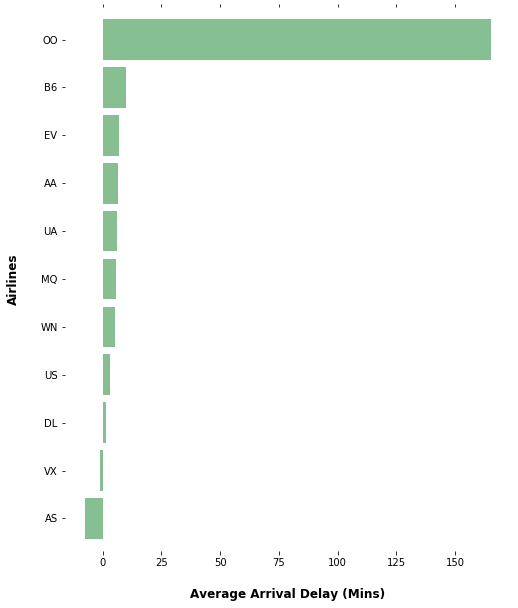

In [19]:
ax1 = arrival_delay.plot(kind='barh', figsize=(8,10), color='#86bf91', zorder=2, width=0.85)

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

ax1.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", labelleft="on")

vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle="dashed", alpha=0.4, color="#eeeeee", zorder=1)
    
ax1.set_xlabel("Average Arrival Delay (Mins)", labelpad=20, weight="bold", size=12)

ax1.set_ylabel("Airlines", labelpad=20, weight="bold", size=12)

ax1.xaxis.set_major_formatter(StrMethodFormatter("{x:,g}"))

### Map

In [28]:
flights = pd.read_csv("~/Desktop/Flight_Delays/airports.csv")

In [29]:
flights.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [30]:
df2 = df1.set_index('ORIGIN_AIRPORT').join(flights.set_index('IATA_CODE'))

In [31]:
df2.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRPORT', 'CITY', 'STATE',
       'COUNTRY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [32]:
df2.drop("Unnamed: 0", axis=1, inplace=True)

In [33]:
df2.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
ALB  2015      2   14            6      EV           3929      N12160   
ALB  2015      2   21            6      EV           5882      N14148   
ALB  2015      2   21            6      EV           4240      N15980   
ALB  2015      2   28            6      EV           3929      N18102   
ALB  2015      3    7            6      EV           4240      N14117   

    DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  DEPARTURE_TIME  ...  \
ALB                 EWR                 1635          1700.0  ...   
ALB                 EWR                 1635             NaN  ...   
ALB                 EWR                 1907             NaN  ...   
ALB                 EWR                 1635          1637.0  ...   
ALB                 EWR                 1513          1505.0  ...   

     SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  \
ALB             0.0            5.0                 20.0            0.0   
ALB             NaN            NaN                  NaN            NaN   
ALB             NaN            NaN                  NaN            NaN   
ALB             NaN            NaN                  NaN            NaN   
ALB             NaN            NaN                  NaN            NaN   

                          AIRPORT    CITY  STATE  COUNTRY  LATITUDE  LONGITUDE  
ALB  Albany International Airport  Albany     NY      USA  42.74812  -73.80298  
ALB  Albany International Airport  Albany     NY      USA  42.74812  -73.80298  
ALB  Albany International Airport  Albany     NY      USA  42.74812  -73.80298  
ALB  Albany International Airport  Albany     NY      USA  42.74812  -73.80298  
ALB  Albany International Airport  Albany     NY      USA  42.74812  -73.80298  

[5 rows x 36 columns]

In [172]:
df2.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER              1802
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           6282
DEPARTURE_DELAY             0
TAXI_OUT                 6447
WHEELS_OFF               6447
SCHEDULED_TIME              0
ELAPSED_TIME             7038
AIR_TIME                 7038
DISTANCE                    0
WHEELS_ON                6531
TAXI_IN                  6531
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             6531
ARRIVAL_DELAY            7038
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    197142
AIR_SYSTEM_DELAY       160388
SECURITY_DELAY         160388
AIRLINE_DELAY          160388
LATE_AIRCRAFT_DELAY    160388
WEATHER_DELAY          160388
AIRPORT                     0
CITY                        0
STATE                       0
COUNTRY   

In [34]:
df2.DEPARTURE_DELAY.fillna(value=0, inplace=True)

In [ ]:
df2["DELAY"] = df2[(df2["DEPARTURE_DELAY"] > 0) & (df2["ARRIVAL_DELAY"] > 0)]

In [ ]:
df2["DELAY"].head()

In [69]:
!pip install geopandas

In [73]:
import geopandas

In [72]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [74]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [78]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


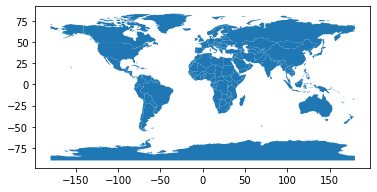

In [79]:
world.plot()

In [85]:
america = world[world["continent"] == "North America"]

In [86]:
america.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
3    35623680  North America                    Canada    CAN   1674000.0   
4   326625791  North America  United States of America    USA  18560000.0   
16   10646714  North America                     Haiti    HTI     19340.0   
17   10734247  North America            Dominican Rep.    DOM    161900.0   
19     329988  North America                   Bahamas    BHS      9066.0   

                                             geometry  
3   MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4   MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
16  POLYGON ((-71.71236 19.71446, -71.62487 19.169...  
17  POLYGON ((-71.70830 18.04500, -71.68774 18.316...  
19  MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...

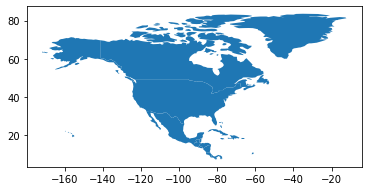

In [87]:
america.plot()

In [155]:
pip install gmplot

     |████████████████████████████████| 122kB 5.1MB/s eta 0:00:01
  Created wheel for gmplot: filename=gmplot-1.2.0-cp37-none-any.whl size=143765 sha256=19d2bb87bd6b95adbec170e7d8059d3598f607136995cee0aad6eeca44230bfd
  Stored in directory: /Users/lynguyenova/Library/Caches/pip/wheels/81/6a/76/4dd6a7cc310ba765894159ee84871e8cd55221d82ef14b81a1
Successfully built gmplot
Note: you may need to restart the kernel to use updated packages.


In [8]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

maxprice= df2.loc[df2['DEPARTURE_DELAY'].idxmax()]


# Create basic Folium city map
city_map = folium.Map(location=[40.7357, 74.1724], 
                       tiles = "Stamen Terrain",
                      zoom_start = 9)
#Add a marker for highest price in county
folium.Marker([maxdelay['LATITUDE'],maxdelay['LONGITUDE']],icon=folium.Icon(color='green')).add_to(city_map)

# # # Add data for heatmp 
# data_heatmap = df2[['LATITUDE','LONGITUDE','DEPARTURE_DELAY']]
# data_heatmap = df2.dropna(axis=0, subset=['LATITUDE','LONGITUDE','DEPARTURE_DELAY'])
data_heatmap = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data_heatmap.iterrows()]
data_heatmap = df2[df2['DEPARTURE_DELAY']>= 0] # Reducing data size so it runs faster
data_heatmap = df2[df2['ARRIVAL_DELAY']>= 0] # Reducing data size so it runs faster
# df2 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in heat_df.iterrows()]
HeatMap(df2).add_to(to_map)

HeatMap(data_heatmap, radius=10, 
        gradient = {.35: 'blue',.55: 'purple',.68:'lime',.78:'red'}).add_to(city_map)
# # Plot!
city_map

/opt/anaconda3/lib/python3.7/site-packages/pkg_resources/__init__.py:1151: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name
/opt/anaconda3/lib/python3.7/site-packages/branca/colormap.py:29: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/anaconda3/lib/python3.7/site-packages/branca/_cnames.json'>
  resource_package, resource_path_cnames).read().decode()
/opt/anaconda3/lib/python3.7/site-packages/pkg_resources/__init__.py:1151: DeprecationWarning: Use of .. or absolute path in a resource path is not allowed and will raise exceptions in a future release.
  self, resource_name
/opt/anaconda3/lib/python3.7/site-packages/branca/colormap.py:33: ResourceWarning: unclosed file <_io.BufferedReader name='/opt/anaconda3/lib/python3.7/site-packages/branca/_schemes.json'>
  resource_package, resource_path_schemes).read().decode()


NameError: name 'maxdelay' is not defined

In [9]:
to_map = folium.Map(location=[40.735657, -74.172363],
                    zoom_start = 13) 
# Ensure you're handing it floats
df2['LATITUDE'] = df2['LATITUDE'].astype(float)
df2['LONGITUDE'] = df2['LONGITUDE'].astype(float)

heat_df = df2[df2['DEPARTURE_DELAY']>= 0] # Reducing data size so it runs faster
heat_df = df2[df2['ARRIVAL_DELAY']>= 0] # Reducing data size so it runs faster
# heat_df = heat_df[['LATITUDE', 'LONGTITUDE']]
# heat_df = heat_df.dropna(axis=0, subset=["LATITUDE", "LONGITUDE"])

In [10]:
df2 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in heat_df.iterrows()]

In [11]:
HeatMap(df2).add_to(to_map)

In [27]:
to_map

In [14]:
df2 = pd.DataFrame(df2)

In [19]:
df2.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'AIRPORT', 'CITY', 'STATE',
       'COUNTRY', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [20]:
location=df2.groupby(['LATITUDE','LONGITUDE','DEPARTURE_DELAY']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>5]
location['color']=location['count'].apply(lambda count:"Black" if count>=400 else
                                         "green" if count>=300 and count<400 else
                                         "Orange" if count>=200 and count<300 else
                                         "darkblue" if count>=150 and count<200 else
                                         "red" if count>=100 and count<150 else
                                         "lightblue" if count>=75 and count<100 else
                                         "brown" if count>=50 and count<75 else
                                         "grey")
location['size']=location['count'].apply(lambda count:12 if count>=400 else
                                         10 if count>=300 and count<400 else
                                         8 if count>=200 and count<300 else
                                         6 if count>=150 and count<200 else
                                         4 if count>=100 and count<150 else
                                         2 if count>=75 and count<100 else
                                         1 if count>=50 and count<75 else
                                         0.1)
location

LATITUDE  LONGITUDE  DEPARTURE_DELAY  count  color  size
7166  40.69250  -74.16866             -3.0   6998  Black  12.0
7165  40.69250  -74.16866             -4.0   6687  Black  12.0
7164  40.69250  -74.16866             -5.0   6575  Black  12.0
7167  40.69250  -74.16866             -2.0   6472  Black  12.0
7168  40.69250  -74.16866             -1.0   5725  Black  12.0
...        ...        ...              ...    ...    ...   ...
9683  43.11887  -77.67238            -15.0      6   grey   0.1
862   26.53617  -81.75517             48.0      6   grey   0.1
2765  32.89595  -97.03720             60.0      6   grey   0.1
9699  43.11887  -77.67238              1.0      6   grey   0.1
2747  32.89595  -97.03720             42.0      6   grey   0.1

[2909 rows x 6 columns]

In [21]:
m=folium.Map([40.735657, -74.172363],zoom_start=11)
#location=location[0:2000]
for lat,lon,area,color,count,size in zip(location['LATITUDE'],location['LONGITUDE'],location['DEPARTURE_DELAY'],location['color'],location['count'],location['size']):
     folium.CircleMarker([lat, lon],
                            popup=area,
                            radius=size,
                            color='b',
                            fill=True,
                            fill_opacity=0.7,
                            fill_color=color,
                           ).add_to(m)
m.save('LA collisions.html')

In [22]:
location1=location[0:100]
location_data = location[['LATITUDE', 'LONGITUDE']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(location_data, radius=15))
m.save('heatmap.html')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  """


In [26]:
HeatMap(location_data).add_to(to_map)

In [196]:
# check if we are really in King County, USA
delay = df2[(df2['DEPARTURE_DELAY'] >= 1)]
len(delay)
delay_map = folium.Map(location=[40.7357, 74.1724],
                        zoom_start=13,
                        tiles='openstreetmap')
                        
for i in delay.index:
    lat = delay.lat[i]
    long = delay.long[i]
    marker = folium.Marker([lat, long]).add_to(delay_map)
    
delay_map # seems like we are

AttributeError: 'DataFrame' object has no attribute 'lat'

In [ ]:
for i in delay.index:
    lat = delay.lat[i]
    long = delay.long[i]
    price = delay.price[i]
    
    marker = folium.Marker([lat, long]).add_to(delay_map)
    popup_text = "Price: {}, Sqft: {}".format(price,sqft_living)
    popup = folium.Popup(popup_text, parse_html=True)
    marker = folium.Marker([lat, long], popup=popup).add_to(waterfront_map)

waterfront_map

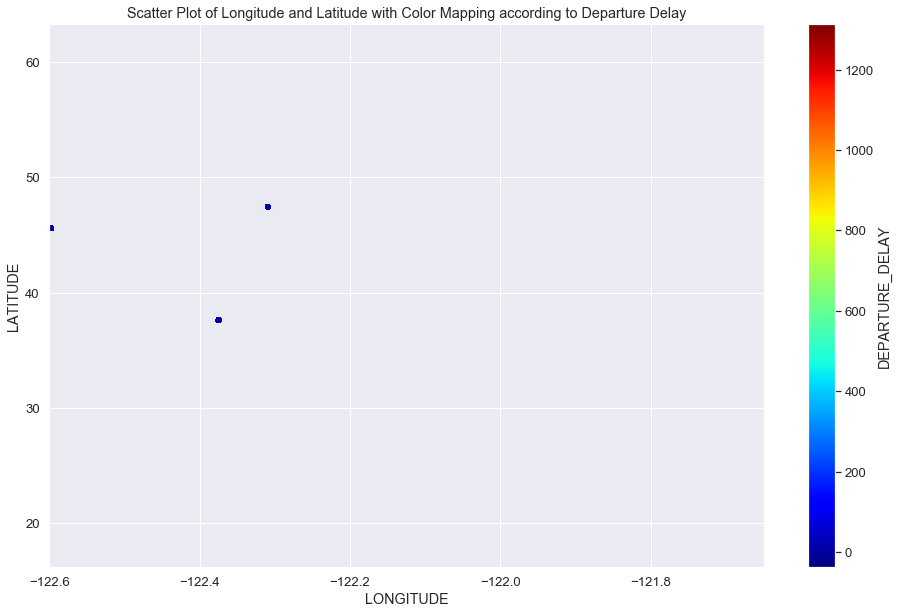

In [183]:
sns.set(font_scale = 1.2)

df2.plot(kind = 'scatter', 
        x = 'LONGITUDE', 
        y = 'LATITUDE', 
        figsize = (16,10), 
        c= 'DEPARTURE_DELAY', 
        cmap = 'jet', 
        colorbar = True, 
        sharex = False,
       title = 'Scatter Plot of Longitude and Latitude with Color Mapping according to Departure Delay',
       xlim = [-122.6, -121.65])
plt.show()

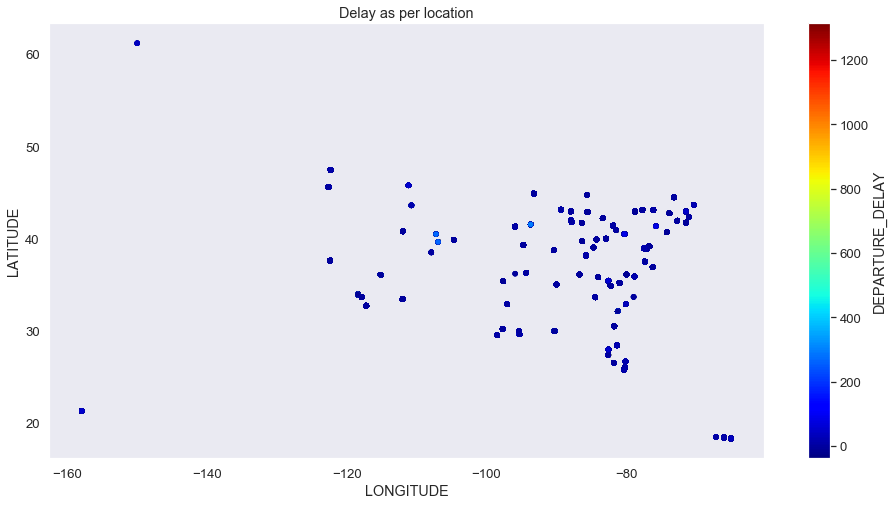

In [185]:
df2.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", figsize=(16, 8), c="DEPARTURE_DELAY", 
             cmap="jet", colorbar=True, sharex=False)
plt.grid(which='both')
plt.title('Delay as per location')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

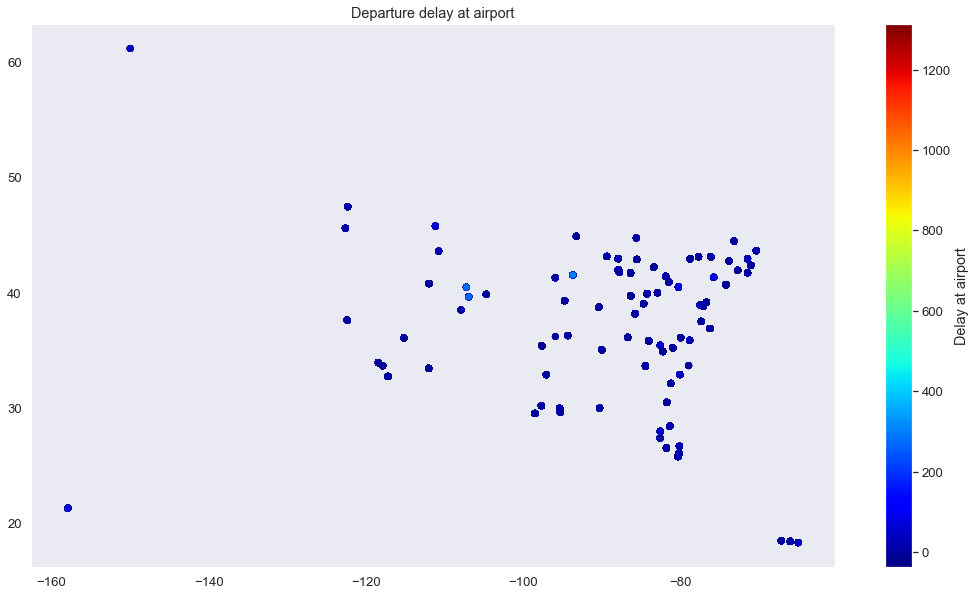

In [188]:
plt.figure(figsize=(18,10))
plt.scatter(df2['LONGITUDE'], df2['LATITUDE'], c=df2['DEPARTURE_DELAY'], cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Delay at airport')
plt.grid(which='both')
plt.title('Departure delay at airport')
plt.show

In [38]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

maxdelay=df2.loc[df2['DEPARTURE_DELAY'].idxmax()]


# Create basic Folium city map
city_map = folium.Map(location=[40.735657, -74.172363], 
                       tiles = "Stamen Terrain",
                      zoom_start = 9)
#Add a marker for highest price in county
folium.Marker([maxdelay['LATITUDE'],maxdelay['LONGITUDE']],icon=folium.Icon(color='green')).add_to(city_map)

# Add data for heatmp 
data_heatmap = df2[['LATITUDE','LONGITUDE','DEPARTURE_DELAY']]
data_heatmap = df2.dropna(axis=0, subset=['LATITUDE','LONGITUDE','DEPARTURE_DELAY'])
data_heatmap = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10, 
        gradient = {.35: 'blue',.55: 'purple',.68:'lime',.78:'red'}).add_to(city_map)
# Plot!
city_map

ValueError: Location should consist of two numerical values, but BQN    18.49486
BQN    18.49486
BQN    18.49486
BQN    18.49486
BQN    18.49486
         ...   
BQN    18.49486
BQN    18.49486
BQN    18.49486
BQN    18.49486
BQN    18.49486
Name: LATITUDE, Length: 291, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [33]:
df2["LATITUDE"].value_counts()

40.69250    101772
33.64044      5091
37.61900      5025
28.42889      4790
33.94254      4618
             ...  
38.50887        23
40.48118        17
33.67975         8
61.17432         7
36.19837         3
Name: LATITUDE, Length: 87, dtype: int64

In [37]:
df2["LATITUDE"] = pd.to_numeric(df2["LATITUDE"], errors='coerce')

# Data Transformations

In [7]:
df = pd.read_csv('~/Desktop/Flight_Delays/newark_flights.csv')

In [8]:
# Clean up null

df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop(df[(df['ORIGIN_AIRPORT']=='EWR') & (df['DEPARTURE_TIME'].isna())].index, inplace=True)
df.drop(df[(df['DESTINATION_AIRPORT']=='EWR') & (df['ARRIVAL_TIME'].isna())].index, inplace=True)
df.drop(df[(df['ARRIVAL_DELAY'].isna())].index, inplace=True)
delay = list(df[df.columns[-6:]].columns)
for cols in delay:
    if df[cols].isna().any():
        df[cols].fillna(value=0, inplace=True)

In [9]:
# Clean up date and time
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])
df["ARR_HOUR_SCH"] = df["SCHEDULED_ARRIVAL"].apply(lambda x: int(str(int(x))[0:2]) if len(str(int(x)))==4 else int(str(int(x))[0:1]))
df["ARR_MIN_SCH"]  = df["SCHEDULED_ARRIVAL"].apply(lambda x: int(str(int(x))[-2:]))
df["DEP_HOUR_SCH"] = df["SCHEDULED_DEPARTURE"].apply(lambda x: int(str(int(x))[0:2]) if len(str(int(x)))==4 else int(str(int(x))[0:1]))
df["DEP_MIN_SCH"]  = df["SCHEDULED_DEPARTURE"].apply(lambda x: int(str(int(x))[-2:]))
df = df.rename(columns={'ARR_HOUR_SCH':'HOUR', 'ARR_MIN_SCH':'MINUTE'})
df["SCHEDULED_ARRIVAL"] = pd.to_datetime(df[['YEAR','MONTH', 'DAY', 'HOUR', 'MINUTE']])
df["SCH_ARR_TEMP"] = pd.to_datetime(df[['YEAR','MONTH', 'DAY', 'HOUR']])
df.drop(['HOUR','MINUTE'], axis=1, inplace=True)
df = df.rename(columns={'DEP_HOUR_SCH':'HOUR', 'DEP_MIN_SCH':'MINUTE'})
df["SCHEDULED_DEPARTURE"] = pd.to_datetime(df[['YEAR','MONTH', 'DAY', 'HOUR', 'MINUTE']])
df["SCH_DEP_TEMP"] = pd.to_datetime(df[['YEAR','MONTH', 'DAY', 'HOUR']])
df["NYC_TIME_TEMP"] = df.apply(lambda row: row['SCH_ARR_TEMP'] if row['DESTINATION_AIRPORT'] == 'EWR' else row['SCH_DEP_TEMP'], axis=1)
df.drop(['HOUR','MINUTE', 'SCH_ARR_TEMP', 'SCH_DEP_TEMP'], axis=1, inplace=True)

# Combine United Express (EV) as mainline United (UA)
df['AIRLINE'] = df.apply(lambda row: 'UA' if row['AIRLINE'] == 'EV' else row['AIRLINE'], axis=1)

# Dummy variables for reasons of delay
delay_cols = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
              'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
for col in delay_cols:
    df[col] = df[col].apply(lambda row: 1 if row > 0 else 0)
    
# Dummy variables for Arrival or Departure
df['DEPARTURE'] = df.apply(lambda row: 0 if row['DESTINATION_AIRPORT'] == 'EWR' else 1, axis=1)

# Time in reference to Newark only
df['SCHEDULED_TIME'] = df.apply(lambda row: row['SCHEDULED_DEPARTURE'] if row['DEPARTURE'] == 1 else row['SCHEDULED_ARRIVAL'], axis=1)

# Time in reference to Newark only - Hour
df['SCHEDULED_HOUR'] = df['SCHEDULED_TIME'].apply(lambda row: row.hour)

# # Dummy variables for Delay target
df['DELAY'] = df.apply(lambda row: 1 if (row['DEPARTURE']==1)&(row['DEPARTURE_DELAY']>15) else (1 if (row['DEPARTURE']==0)&(row['ARRIVAL_DELAY']>15) else 0), axis=1)

In [10]:
# Keep only relevant columns
keep_columns = ['DATE', 'DAY_OF_WEEK', 'SCHEDULED_HOUR', 'DEPARTURE', 'AIRLINE',
                'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'DISTANCE', 'DELAY', *delay_cols]
temp_columns = ['NYC_TIME_TEMP', 'TAIL_NUMBER']
df = df[keep_columns + temp_columns]

### DarkSky weather dataset

In [11]:
# Import weather database

weather = pd.DataFrame(pd.read_csv('~/Desktop/Flight_Delays/newark_weather.csv'))
weather.drop('Unnamed: 0', axis=1, inplace=True)
weather['temperature'] = weather['temperature'].apply(lambda row: round(row,1))
weather['nyc_time'] = pd.to_datetime(weather['nyc_time'])
weather = weather.rename(columns={'icon':'weather'})
weather = weather.set_index('nyc_time')
weather = weather[weather.columns[:-4]]
weather = pd.get_dummies(weather, prefix='weather', columns=['weather'])
weather.drop(['weather_clear', 'weather_partly-cloudy'], axis=1, inplace=True) # instead of drop first
weather.head()

precipIntensity  temperature  windSpeed  visibility  \
nyc_time                                                                   
2015-01-01 00:00:00              0.0         -4.4       1.66       9.997   
2015-01-01 01:00:00              0.0         -4.4       1.91       9.997   
2015-01-01 02:00:00              0.0         -4.4       2.38       9.997   
2015-01-01 03:00:00              0.0         -5.0       1.85       9.997   
2015-01-01 04:00:00              0.0         -4.4       2.77       9.997   

                     weather_cloudy  weather_fog  weather_rain  weather_sleet  \
nyc_time                                                                        
2015-01-01 00:00:00               0            0             0              0   
2015-01-01 01:00:00               0            0             0              0   
2015-01-01 02:00:00               0            0             0              0   
2015-01-01 03:00:00               0            0             0              0   
2015-01-01 04:00:00               0            0             0              0   

                     weather_snow  
nyc_time                           
2015-01-01 00:00:00             0  
2015-01-01 01:00:00             0  
2015-01-01 02:00:00             0  
2015-01-01 03:00:00             0  
2015-01-01 04:00:00             0

In [12]:
# Join main data with weather database

df = df.join(weather, on='NYC_TIME_TEMP')
df.drop('NYC_TIME_TEMP', axis=1, inplace=True)

### Plane registration dataset

In [13]:
# Import plane registration database

plane_reg = pd.DataFrame(pd.read_csv('~/Desktop/Flight_Delays/newark_plane_reg.csv'))
plane_reg.drop('Unnamed: 0', axis=1, inplace=True)
plane_reg = plane_reg.set_index('N-Number')
plane_reg.head()

Registered
N-Number            
N438WN    2003-07-21
N68061    2002-03-08
N914UY    2014-11-07
N446UA    1998-07-02
N18120    2005-02-25

In [14]:
# Join main data with plane registration database

df = df.join(plane_reg, on='TAIL_NUMBER')
df.drop(df[(df['Registered'].isna())].index, inplace=True)
df.drop('TAIL_NUMBER', axis=1, inplace=True)

df['planeAge'] = df['DATE'] - pd.to_datetime(df['Registered'])
df['planeAge'] = df['planeAge'].apply(lambda row: row.total_seconds()/365/24/60/60 if row.total_seconds() > 0 else 0)
df.drop('Registered', axis=1, inplace=True)
df = df.dropna()
df.head()

DATE  DAY_OF_WEEK  SCHEDULED_HOUR  DEPARTURE AIRLINE ORIGIN_AIRPORT  \
0 2015-01-01            4               5          0      UA            SJU   
1 2015-01-01            4               5          0      B6            SJU   
2 2015-01-01            4               5          0      UA            BQN   
3 2015-01-01            4               7          0      UA            JAX   
4 2015-01-01            4               7          0      UA            CHS   

  DESTINATION_AIRPORT  DISTANCE  DELAY  AIR_SYSTEM_DELAY  ...  \
0                 EWR      1608      0                 0  ...   
1                 EWR      1608      0                 0  ...   
2                 EWR      1585      0                 0  ...   
3                 EWR       820      0                 0  ...   
4                 EWR       628      0                 0  ...   

   precipIntensity  temperature  windSpeed  visibility  weather_cloudy  \
0              0.0         -4.4       0.00       9.997             0.0   
1              0.0         -4.4       0.00       9.997             0.0   
2              0.0         -4.4       0.00       9.997             0.0   
3              0.0         -5.6       1.46       9.997             0.0   
4              0.0         -5.6       1.46       9.997             0.0   

   weather_fog  weather_rain  weather_sleet  weather_snow   planeAge  
0          0.0           0.0            0.0           0.0   4.961644  
1          0.0           0.0            0.0           0.0  10.147945  
2          0.0           0.0            0.0           0.0   9.495890  
3          0.0           0.0            0.0           0.0  11.200000  
4          0.0           0.0            0.0           0.0  13.706849  

[5 rows x 24 columns]

In [15]:
# Assign df0 for all columns for analysis and visualization
df0 = df.copy()

# Create dummy variables for categorical variables
df['United'] = df.apply(lambda row: 1 if row['AIRLINE'] == 'UA' else 0, axis=1)
df = pd.get_dummies(df, prefix=['Day','Hour'], columns=['DAY_OF_WEEK','SCHEDULED_HOUR'])

# Assign df using only columns relevant to modelling
drop_list = ['DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
             'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
             'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
df.drop(drop_list, axis=1, inplace=True)

In [16]:
df.describe()

DEPARTURE       DISTANCE          DELAY  precipIntensity  \
count  185142.000000  185142.000000  185142.000000    185142.000000   
mean        0.500410    1096.003846       0.224082         0.002041   
std         0.500001     758.003069       0.416977         0.014739   
min         0.000000      80.000000       0.000000         0.000000   
25%         0.000000     533.000000       0.000000         0.000000   
50%         1.000000     937.000000       0.000000         0.000000   
75%         1.000000    1411.000000       0.000000         0.000000   
max         1.000000    4962.000000       1.000000         0.299300   

         temperature      windSpeed     visibility  weather_cloudy  \
count  185142.000000  185142.000000  185142.000000   185142.000000   
mean       14.444606       4.285667       9.325998        0.232319   
std        11.150732       3.324627       1.961256        0.422312   
min       -17.200000       0.000000       0.000000        0.000000   
25%         5.600000       1.800000       9.997000        0.000000   
50%        15.500000       3.540000       9.997000        0.000000   
75%        23.900000       5.820000       9.997000        0.000000   
max        36.100000      21.930000       9.997000        1.000000   

         weather_fog   weather_rain  ...        Hour_14        Hour_15  \
count  185142.000000  185142.000000  ...  185142.000000  185142.000000   
mean        0.017424       0.043972  ...       0.059592       0.066625   
std         0.130847       0.205033  ...       0.236730       0.249371   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             Hour_16        Hour_17        Hour_18        Hour_19  \
count  185142.000000  185142.000000  185142.000000  185142.000000   
mean        0.073360       0.059905       0.055844       0.056162   
std         0.260727       0.237312       0.229620       0.230235   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Hour_20        Hour_21        Hour_22        Hour_23  
count  185142.000000  185142.000000  185142.000000  185142.000000  
mean        0.064718       0.051037       0.029658       0.022475  
std         0.246028       0.220073       0.169643       0.148222  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 44 columns]

In [17]:
df.shape

(185142, 44)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185142 entries, 0 to 203601
Data columns (total 44 columns):
DEPARTURE          185142 non-null int64
DISTANCE           185142 non-null int64
DELAY              185142 non-null int64
precipIntensity    185142 non-null float64
temperature        185142 non-null float64
windSpeed          185142 non-null float64
visibility         185142 non-null float64
weather_cloudy     185142 non-null float64
weather_fog        185142 non-null float64
weather_rain       185142 non-null float64
weather_sleet      185142 non-null float64
weather_snow       185142 non-null float64
planeAge           185142 non-null float64
United             185142 non-null int64
Day_1              185142 non-null uint8
Day_2              185142 non-null uint8
Day_3              185142 non-null uint8
Day_4              185142 non-null uint8
Day_5              185142 non-null uint8
Day_6              185142 non-null uint8
Day_7              185142 non-null uint8
Hour_1  

### Univariate Analysis

In [19]:
# function to detect outliers
# how many observations left if outliers removed
import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
warnings.filterwarnings('ignore')

def calc_limits(feature):
    q1,q3=df[feature].quantile([0.25,0.75])
    iqr=q3-q1
    rang=1.5*iqr
    return(q1-rang,q3+rang)
    
def plot(feature):
    fig,axes=plt.subplots(1,2)
    sns.boxplot(data=df,x=feature,ax=axes[0])
    sns.distplot(a=df[feature],ax=axes[1],color='#ff4125')
    fig.set_size_inches(15,5)
    
    lower,upper = calc_limits(feature)
    l=[df[feature] for i in df[feature] if i>lower and i<upper] 
    print("Number of data points remaining if outliers removed : ",len(l))

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

Number of data points remaining if outliers removed :  185142
Number of data points remaining if outliers removed :  184480
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  185142
Number of data points remaining if outliers removed :  179436
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  180220
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number of data points remaining if outliers removed :  0
Number

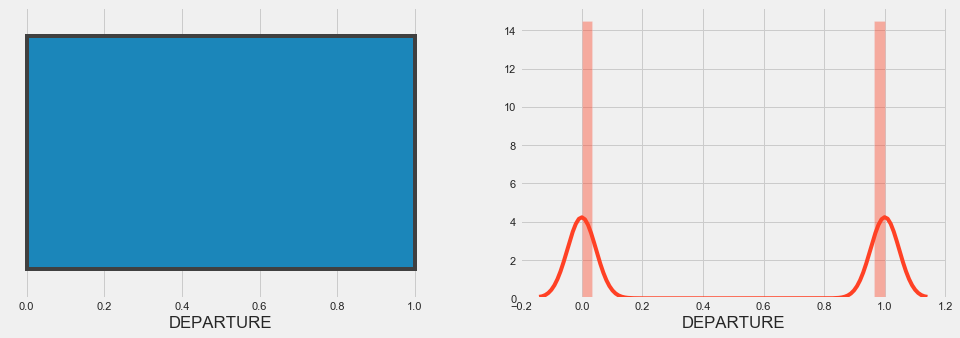

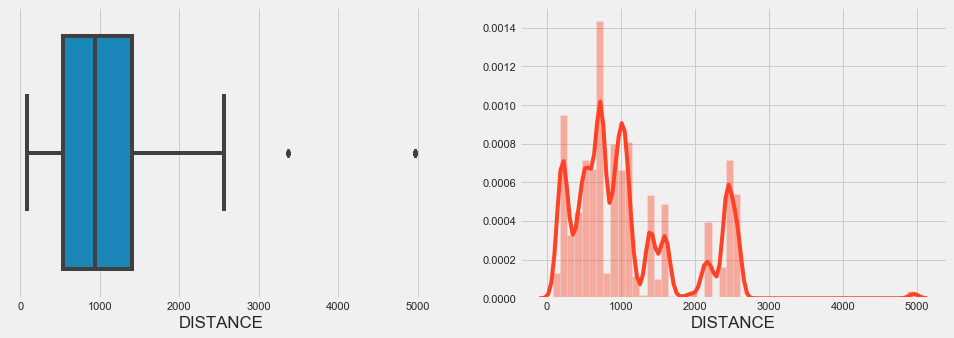

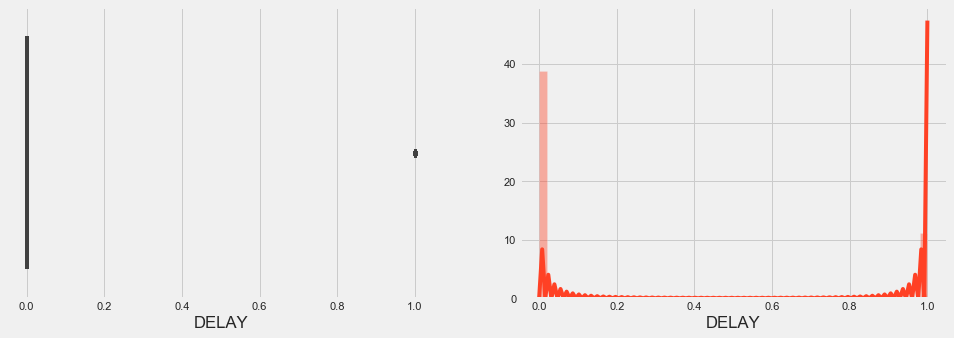

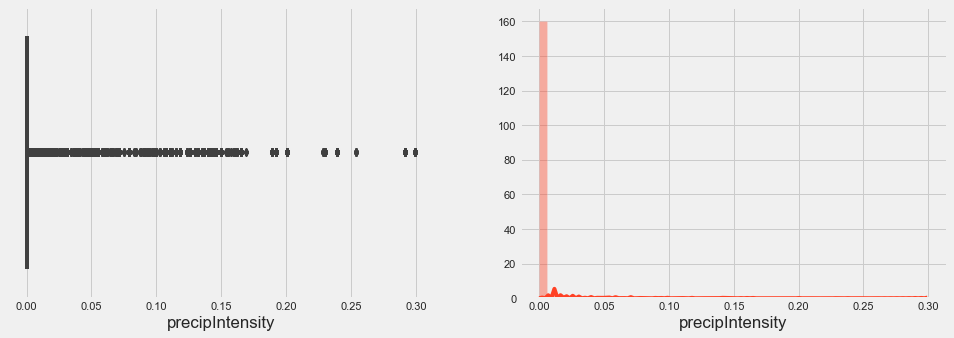

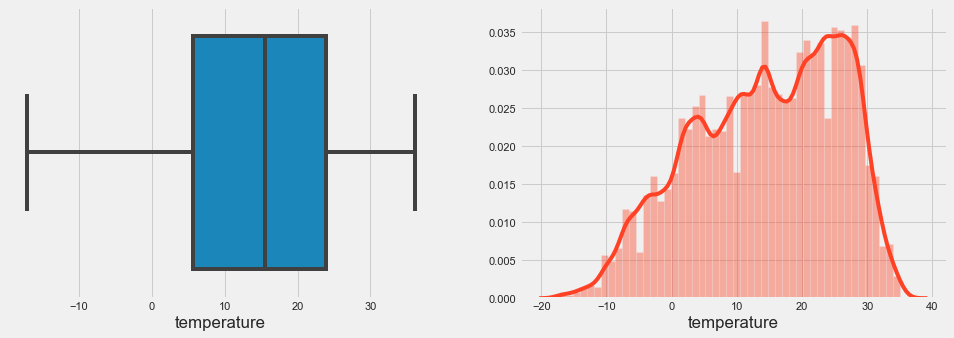

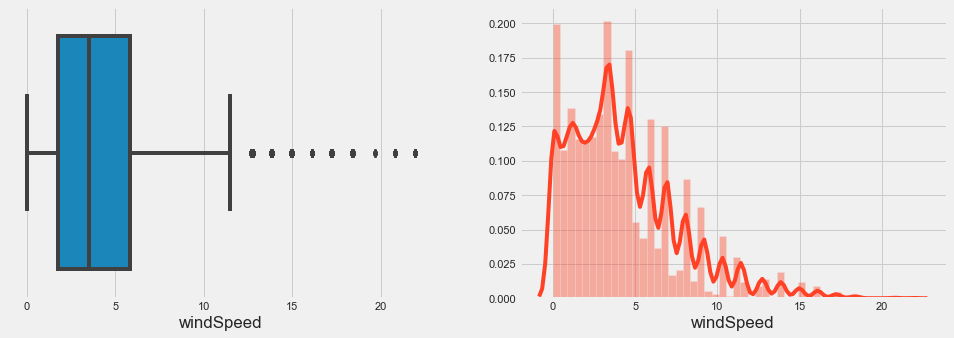

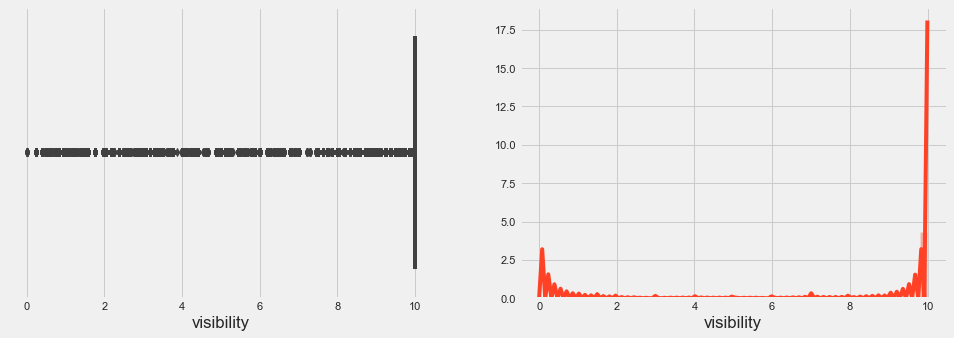

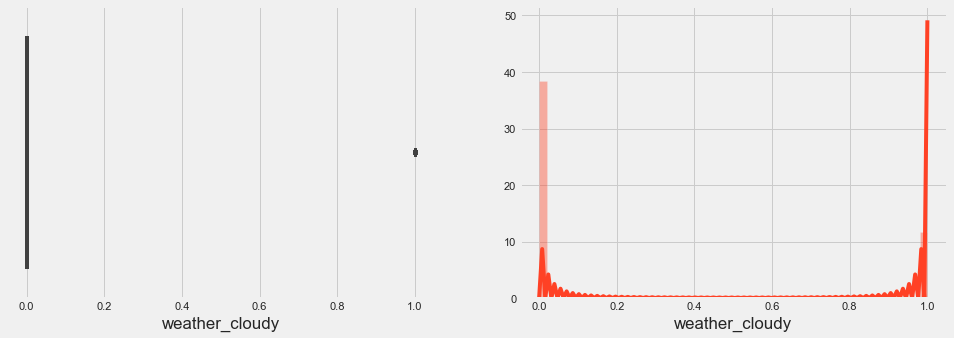

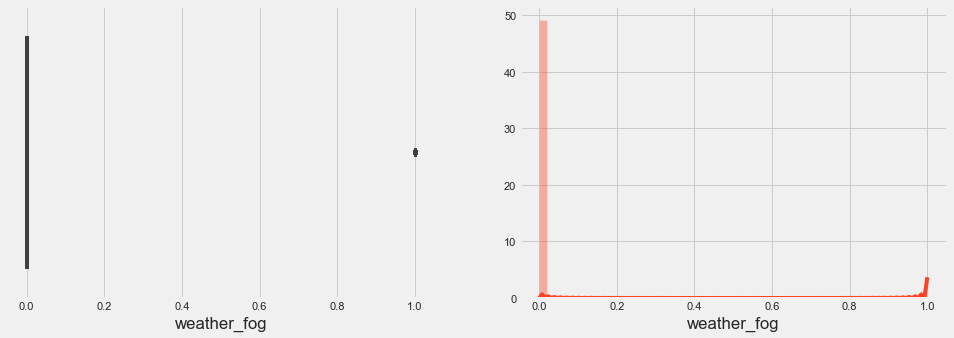

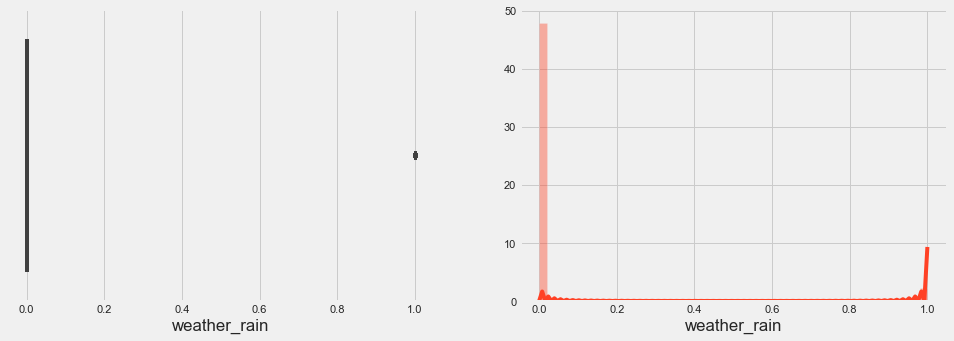

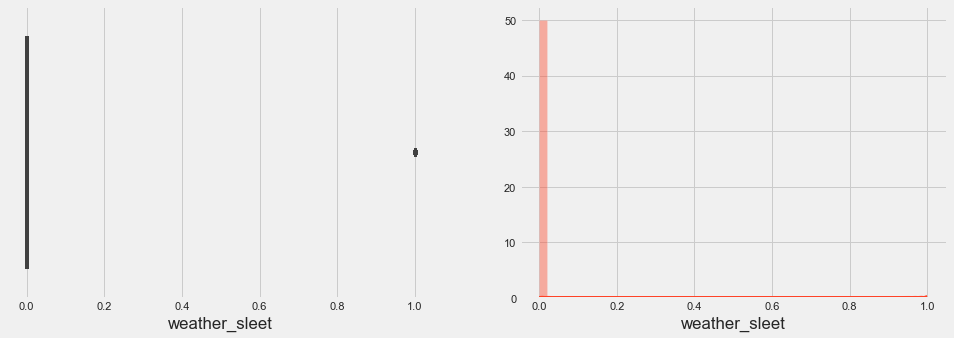

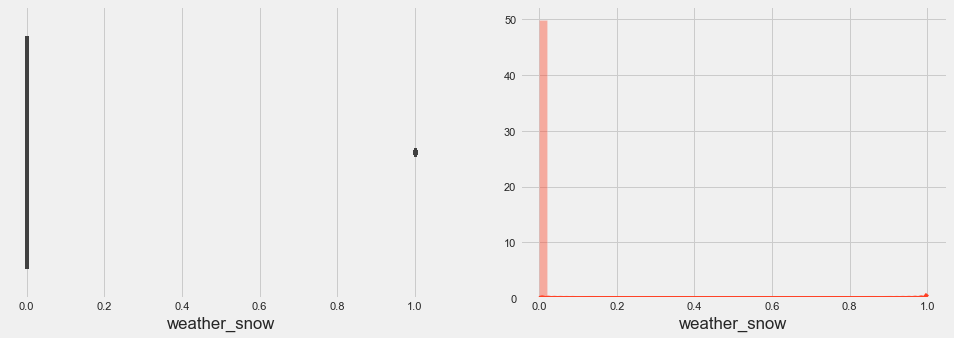

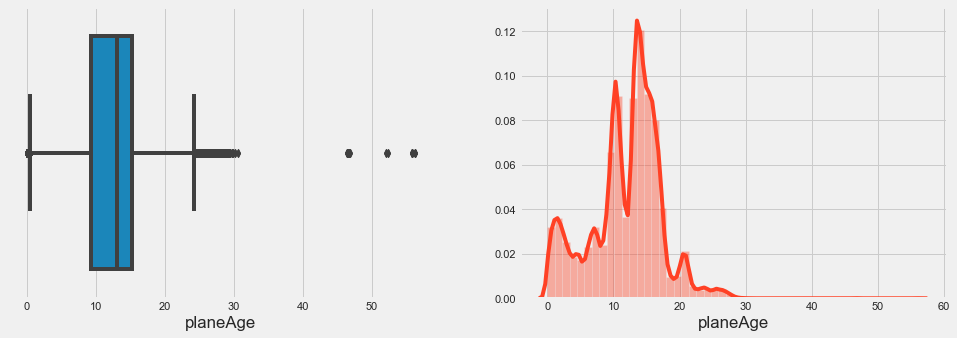

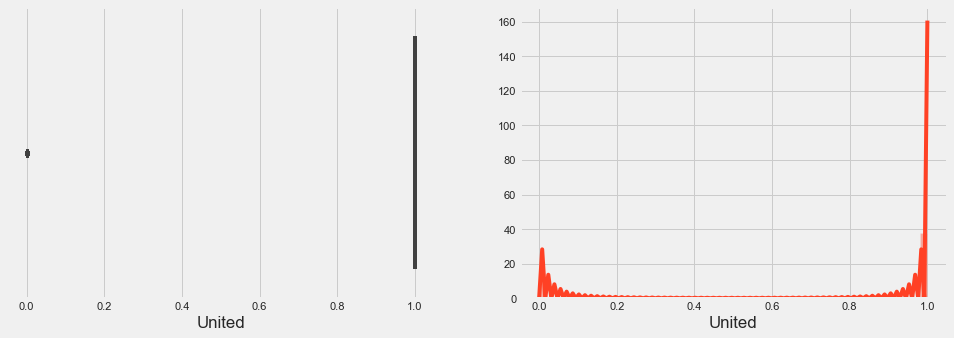

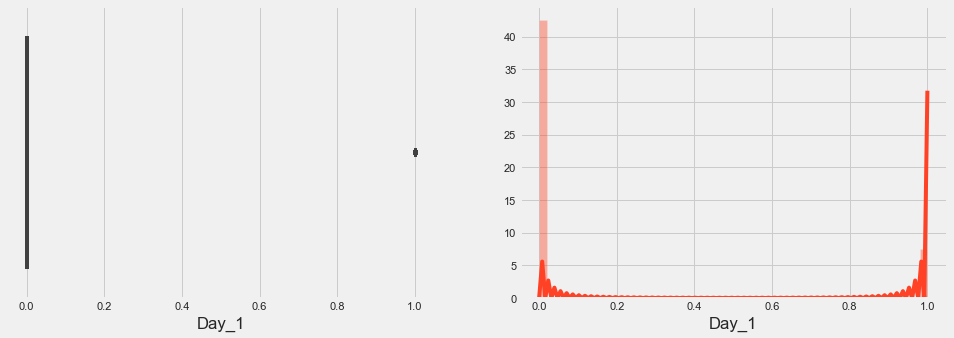

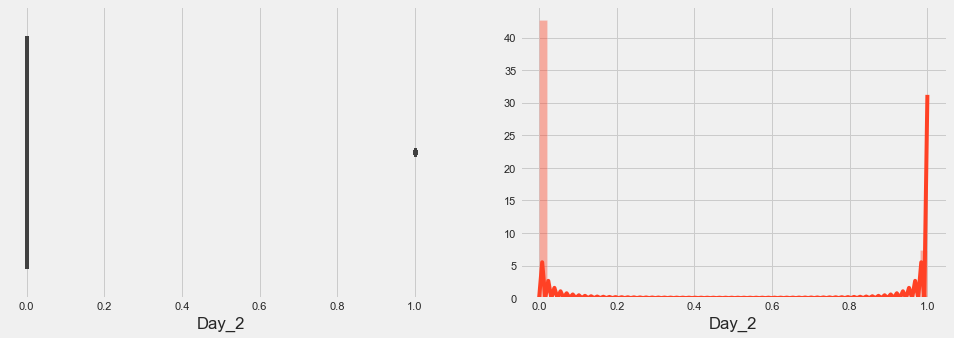

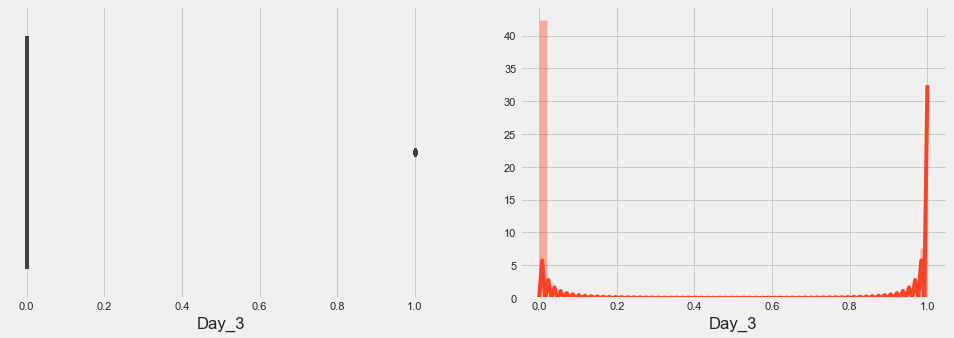

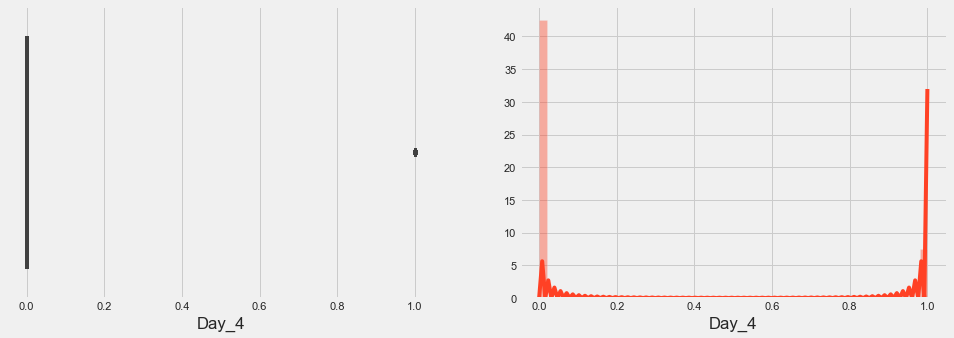

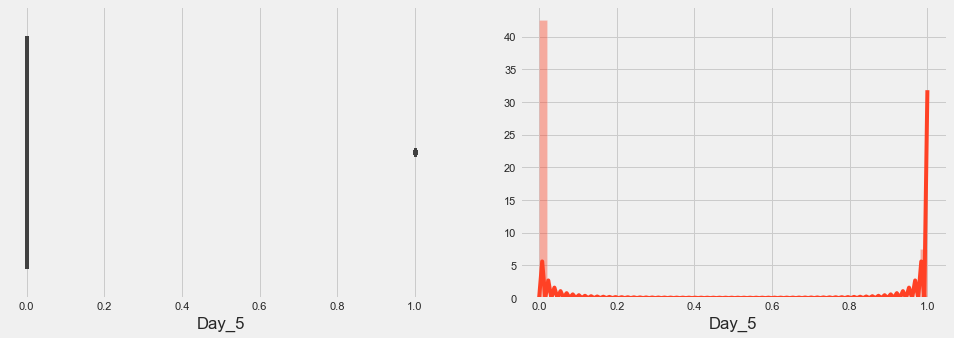

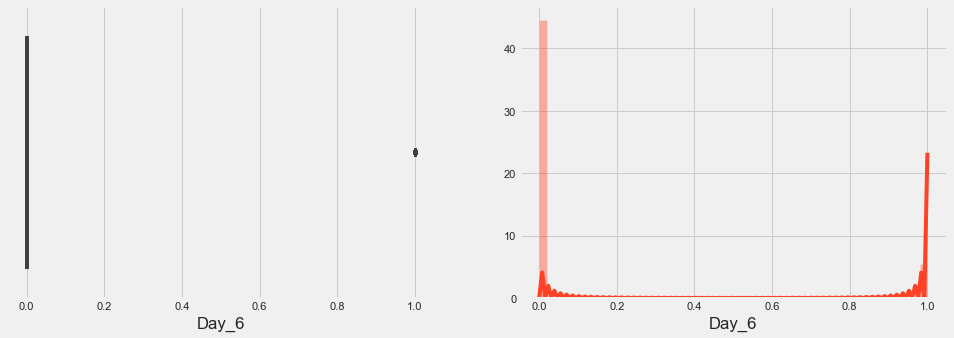

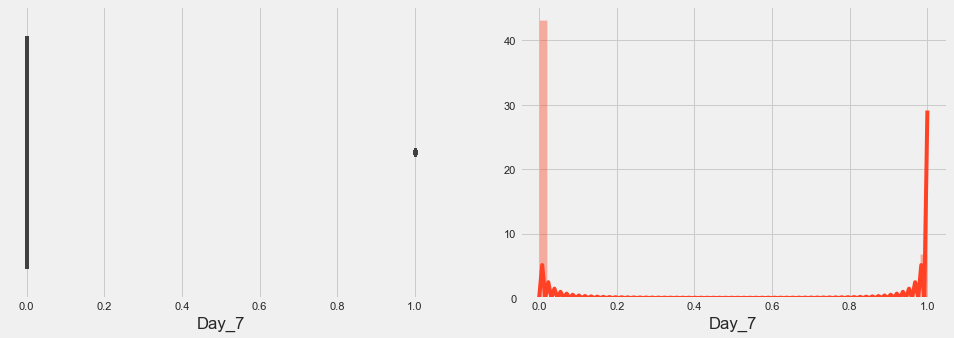

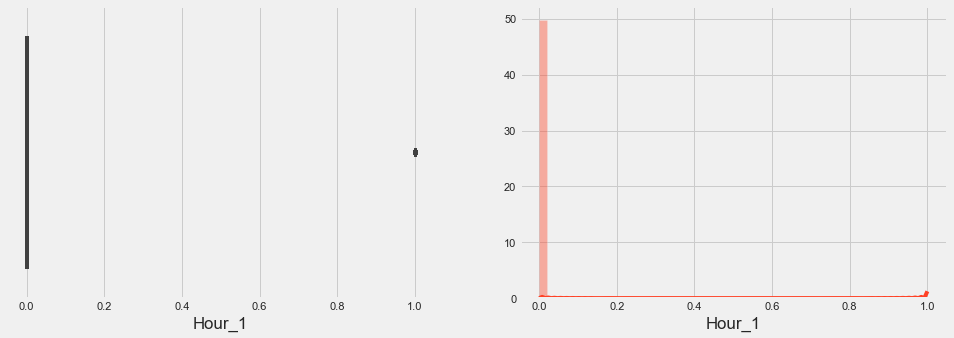

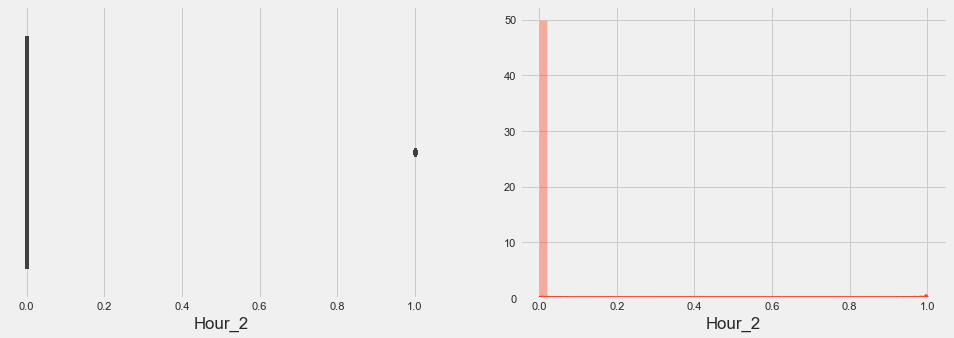

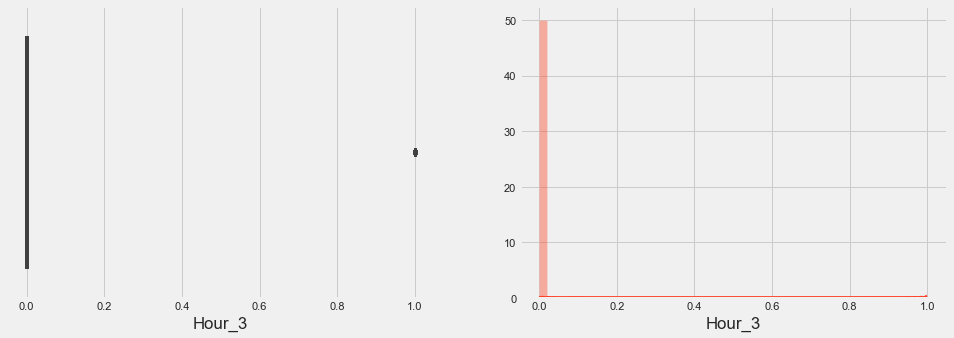

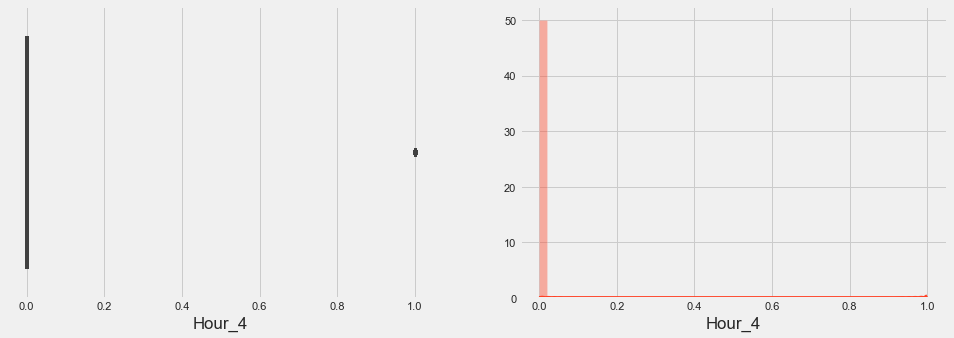

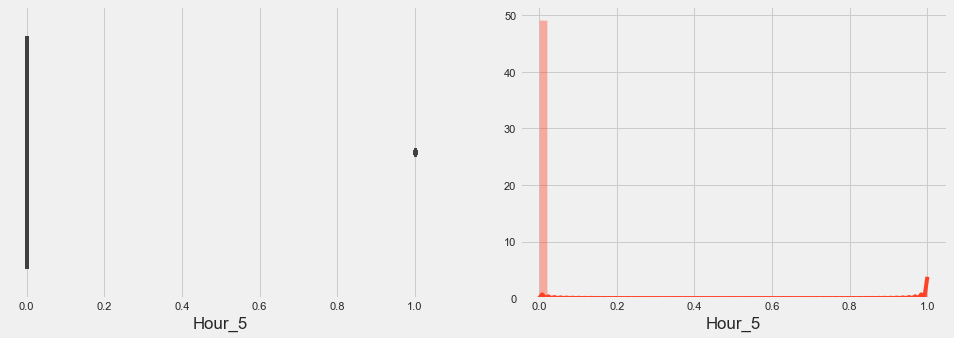

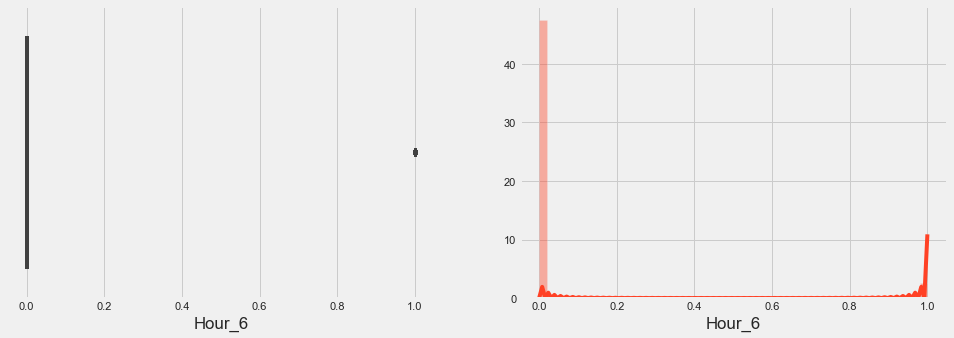

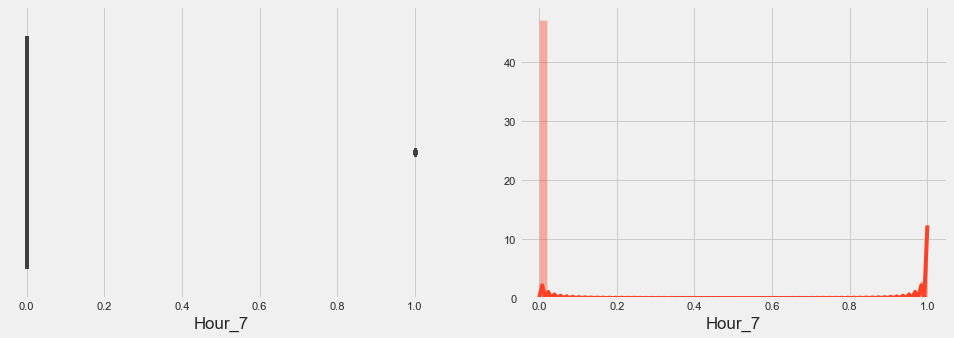

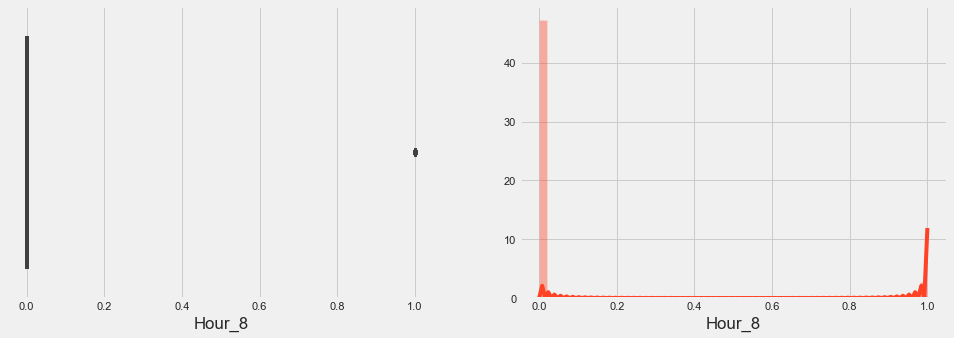

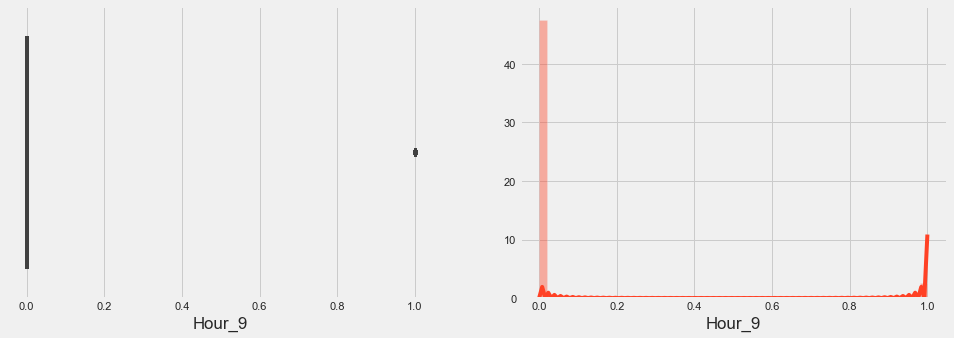

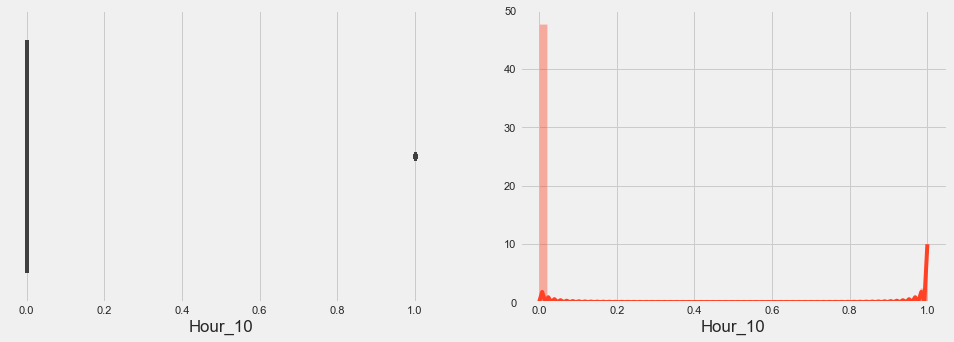

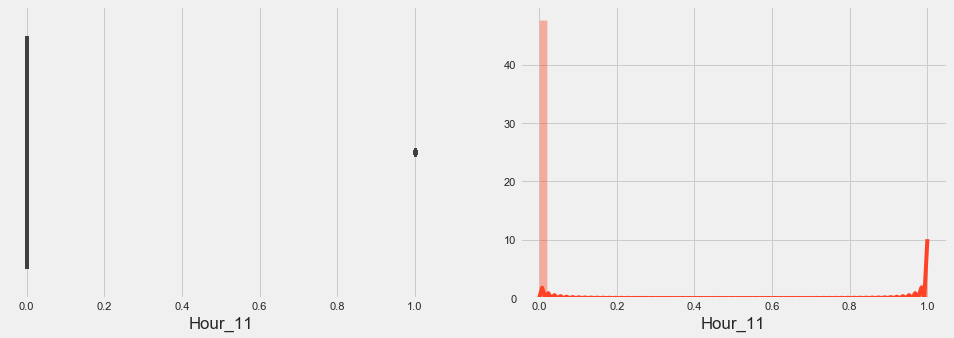

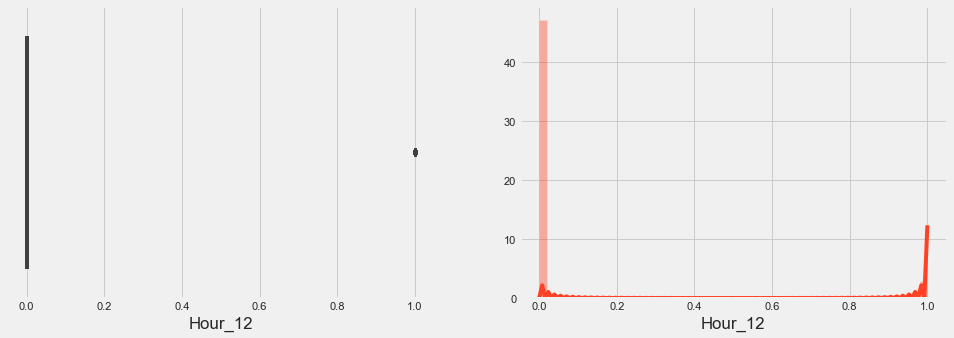

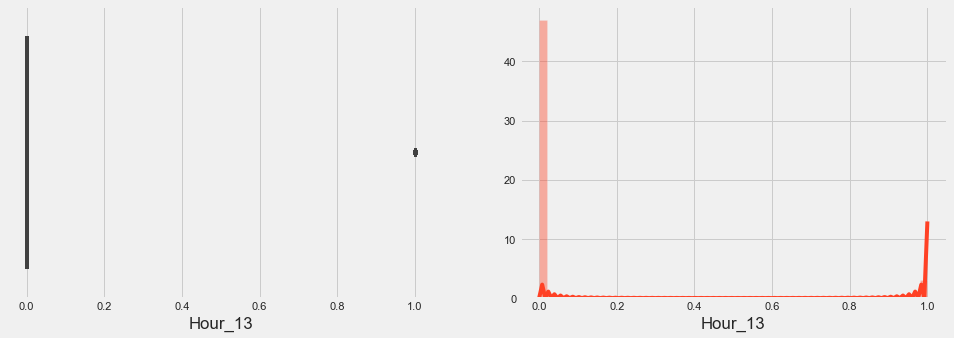

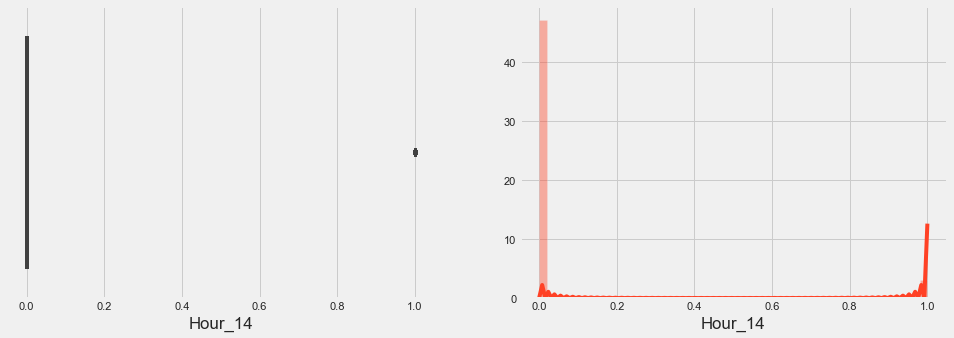

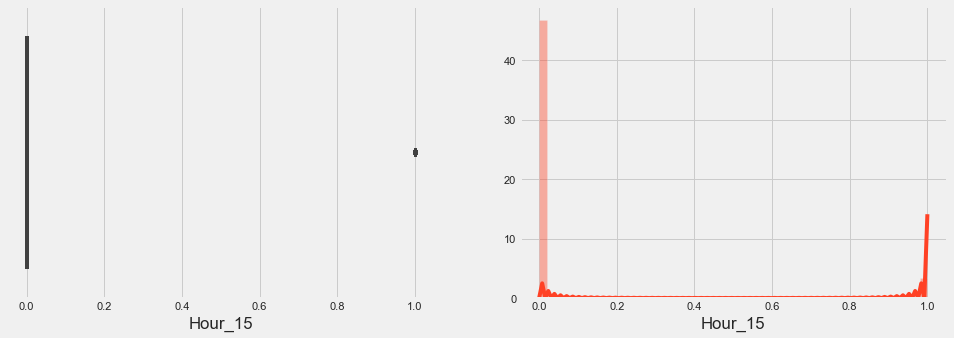

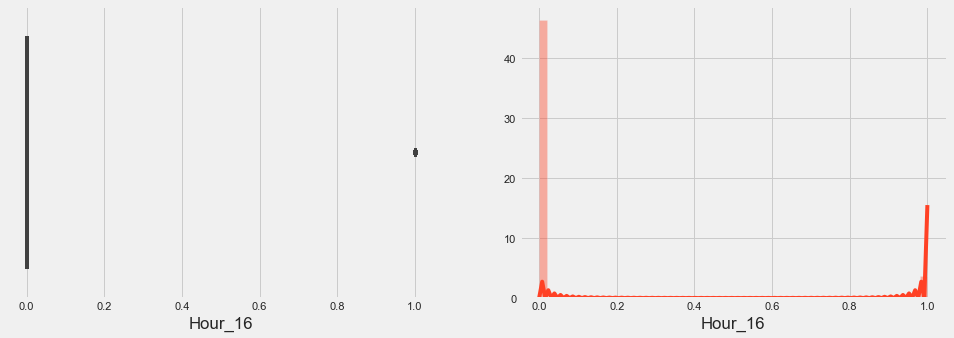

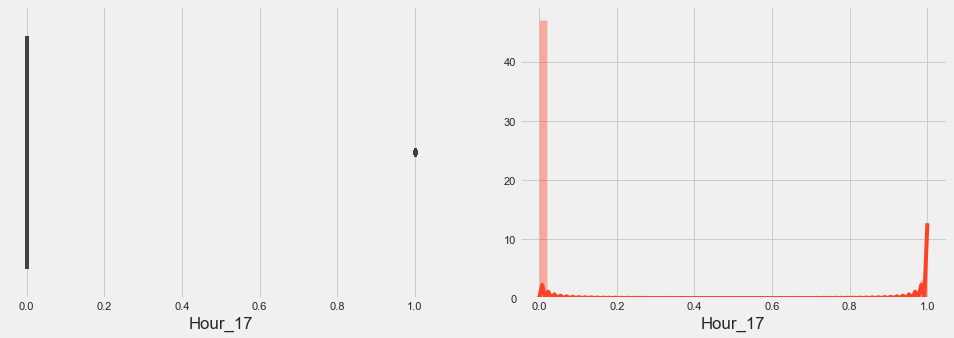

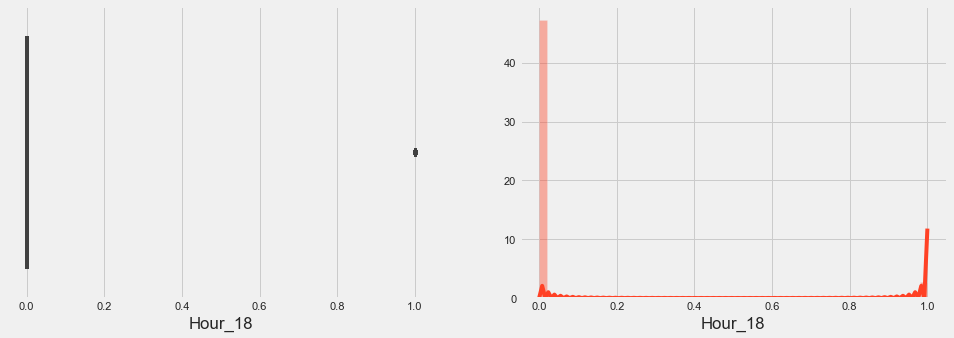

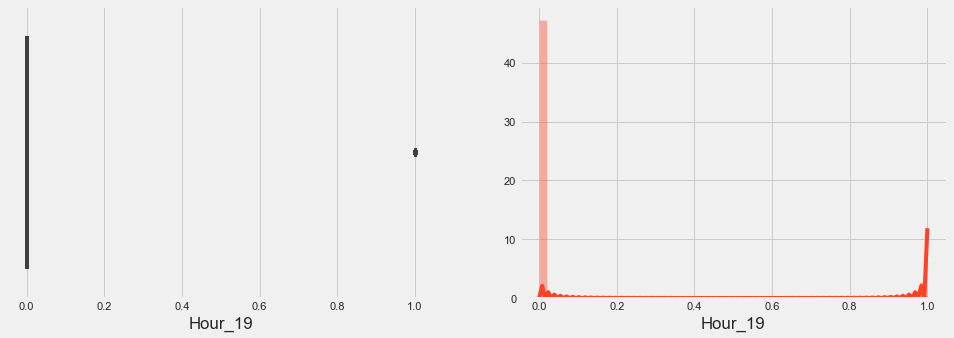

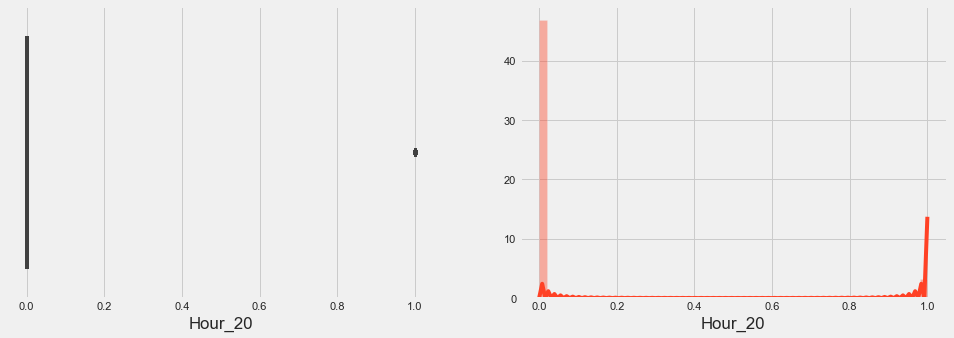

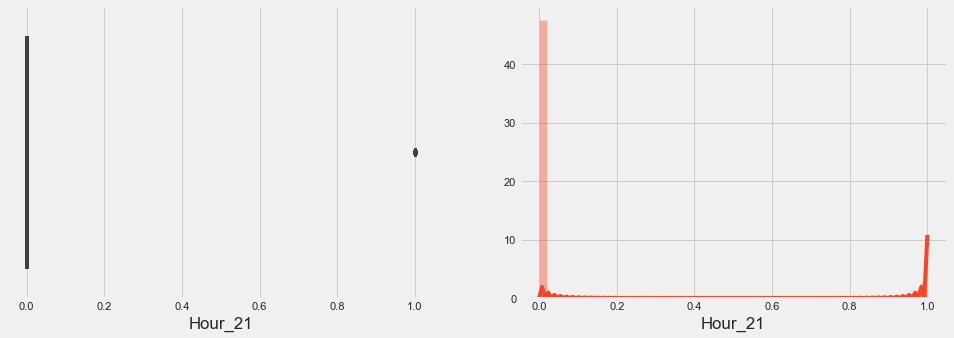

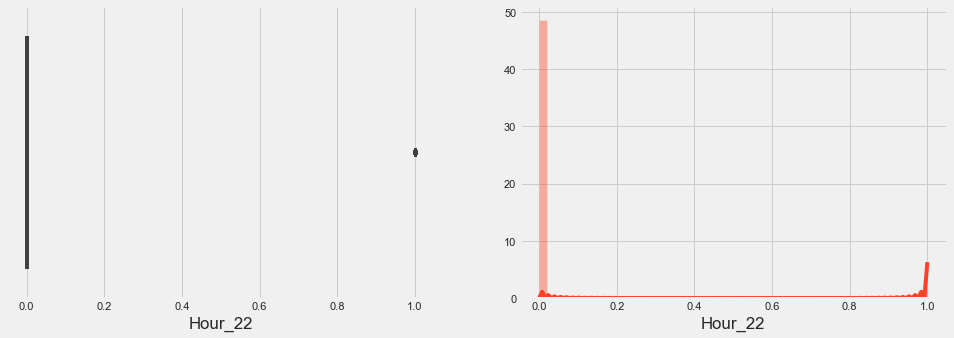

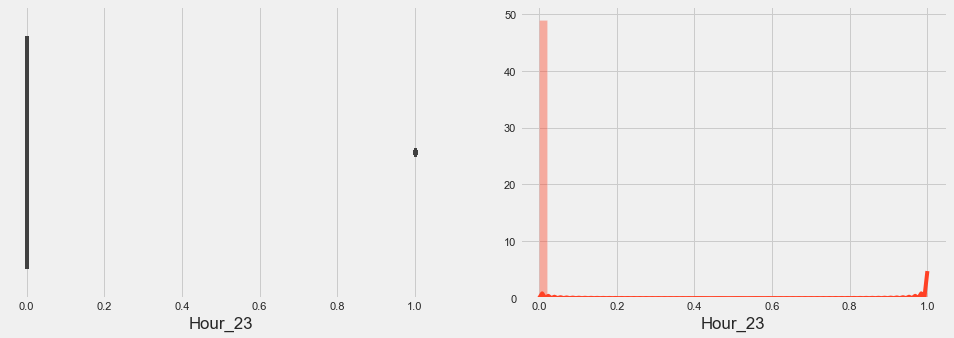

In [20]:
# importing matplotlib to plot
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')

# plot('DELAY')
for col in df:
    plot(col)

In [21]:
# code to remove columns with outliers
# removal of any data point which is an outlier for any feature.

# for col in df.columns:
#     lower,upper = calc_limits(col)
#     df = df[(df[col] >lower) & (df[col]<upper)]df.shape

### Bivariate Analysis

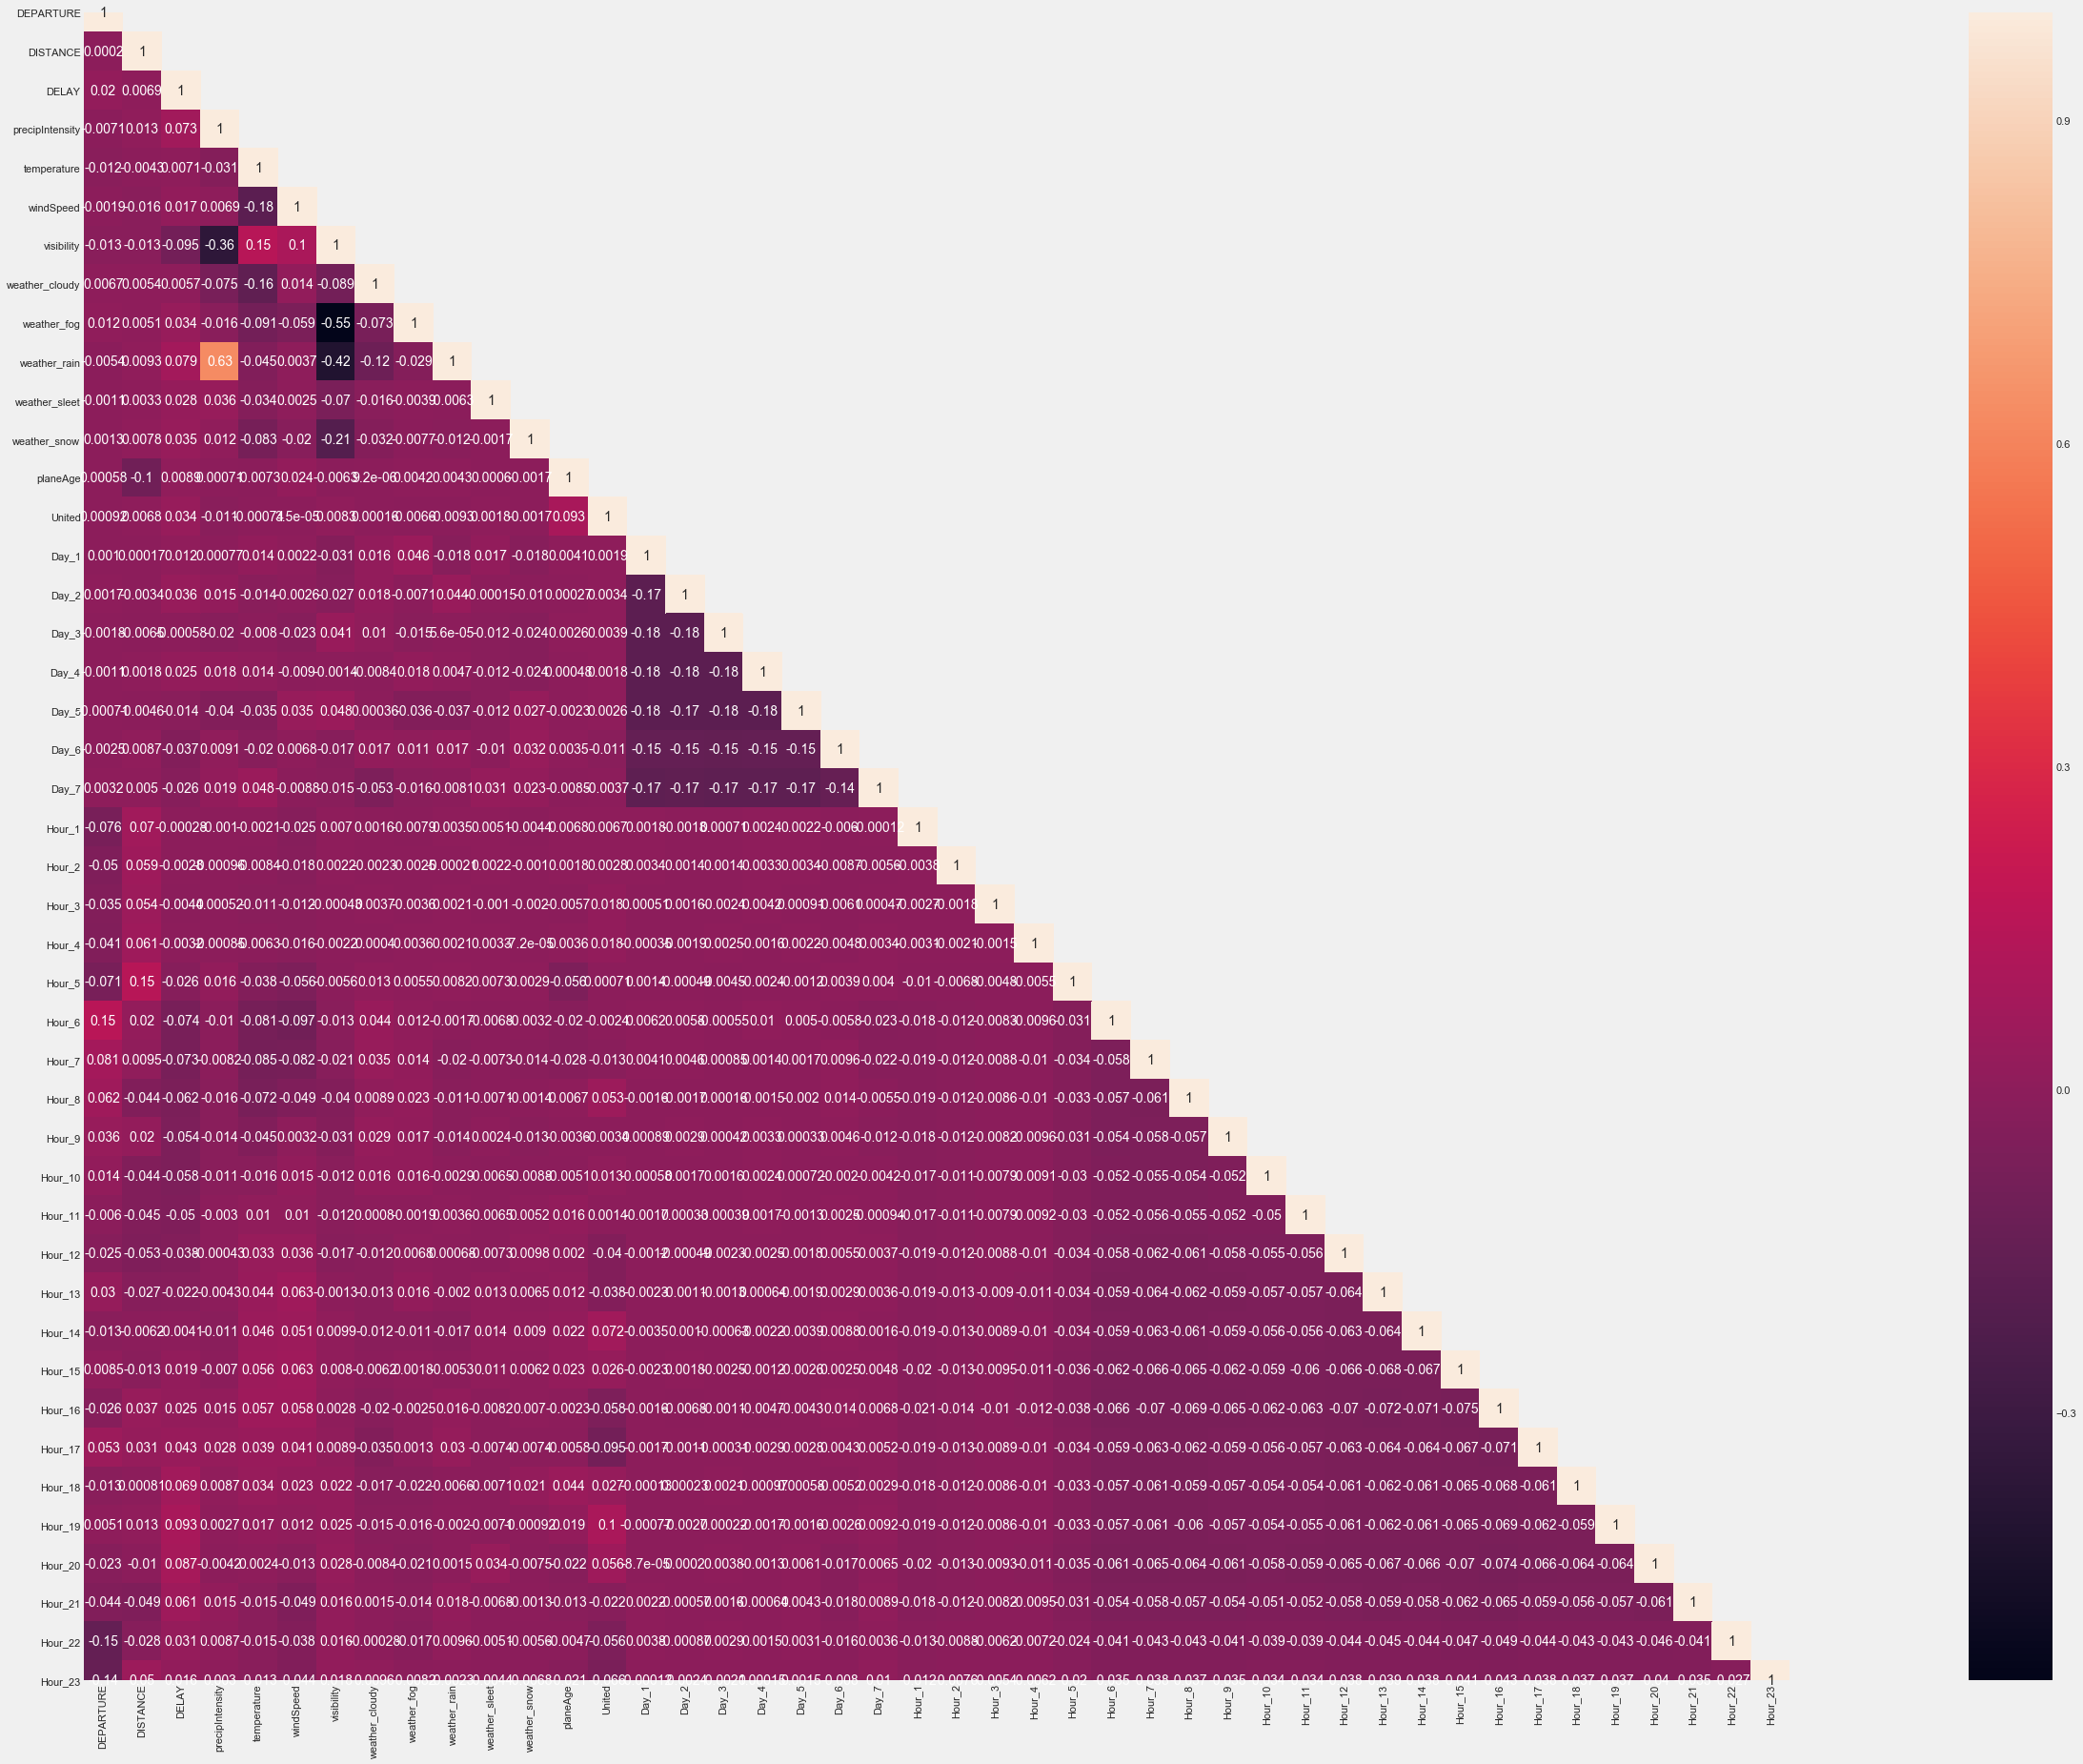

In [22]:
# heatmap
temp = []
for i in df.DELAY:
    if i == 1:
        temp.append(1)
    else:
        temp.append(0)
df['DELAY'] = temp
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(60,30)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

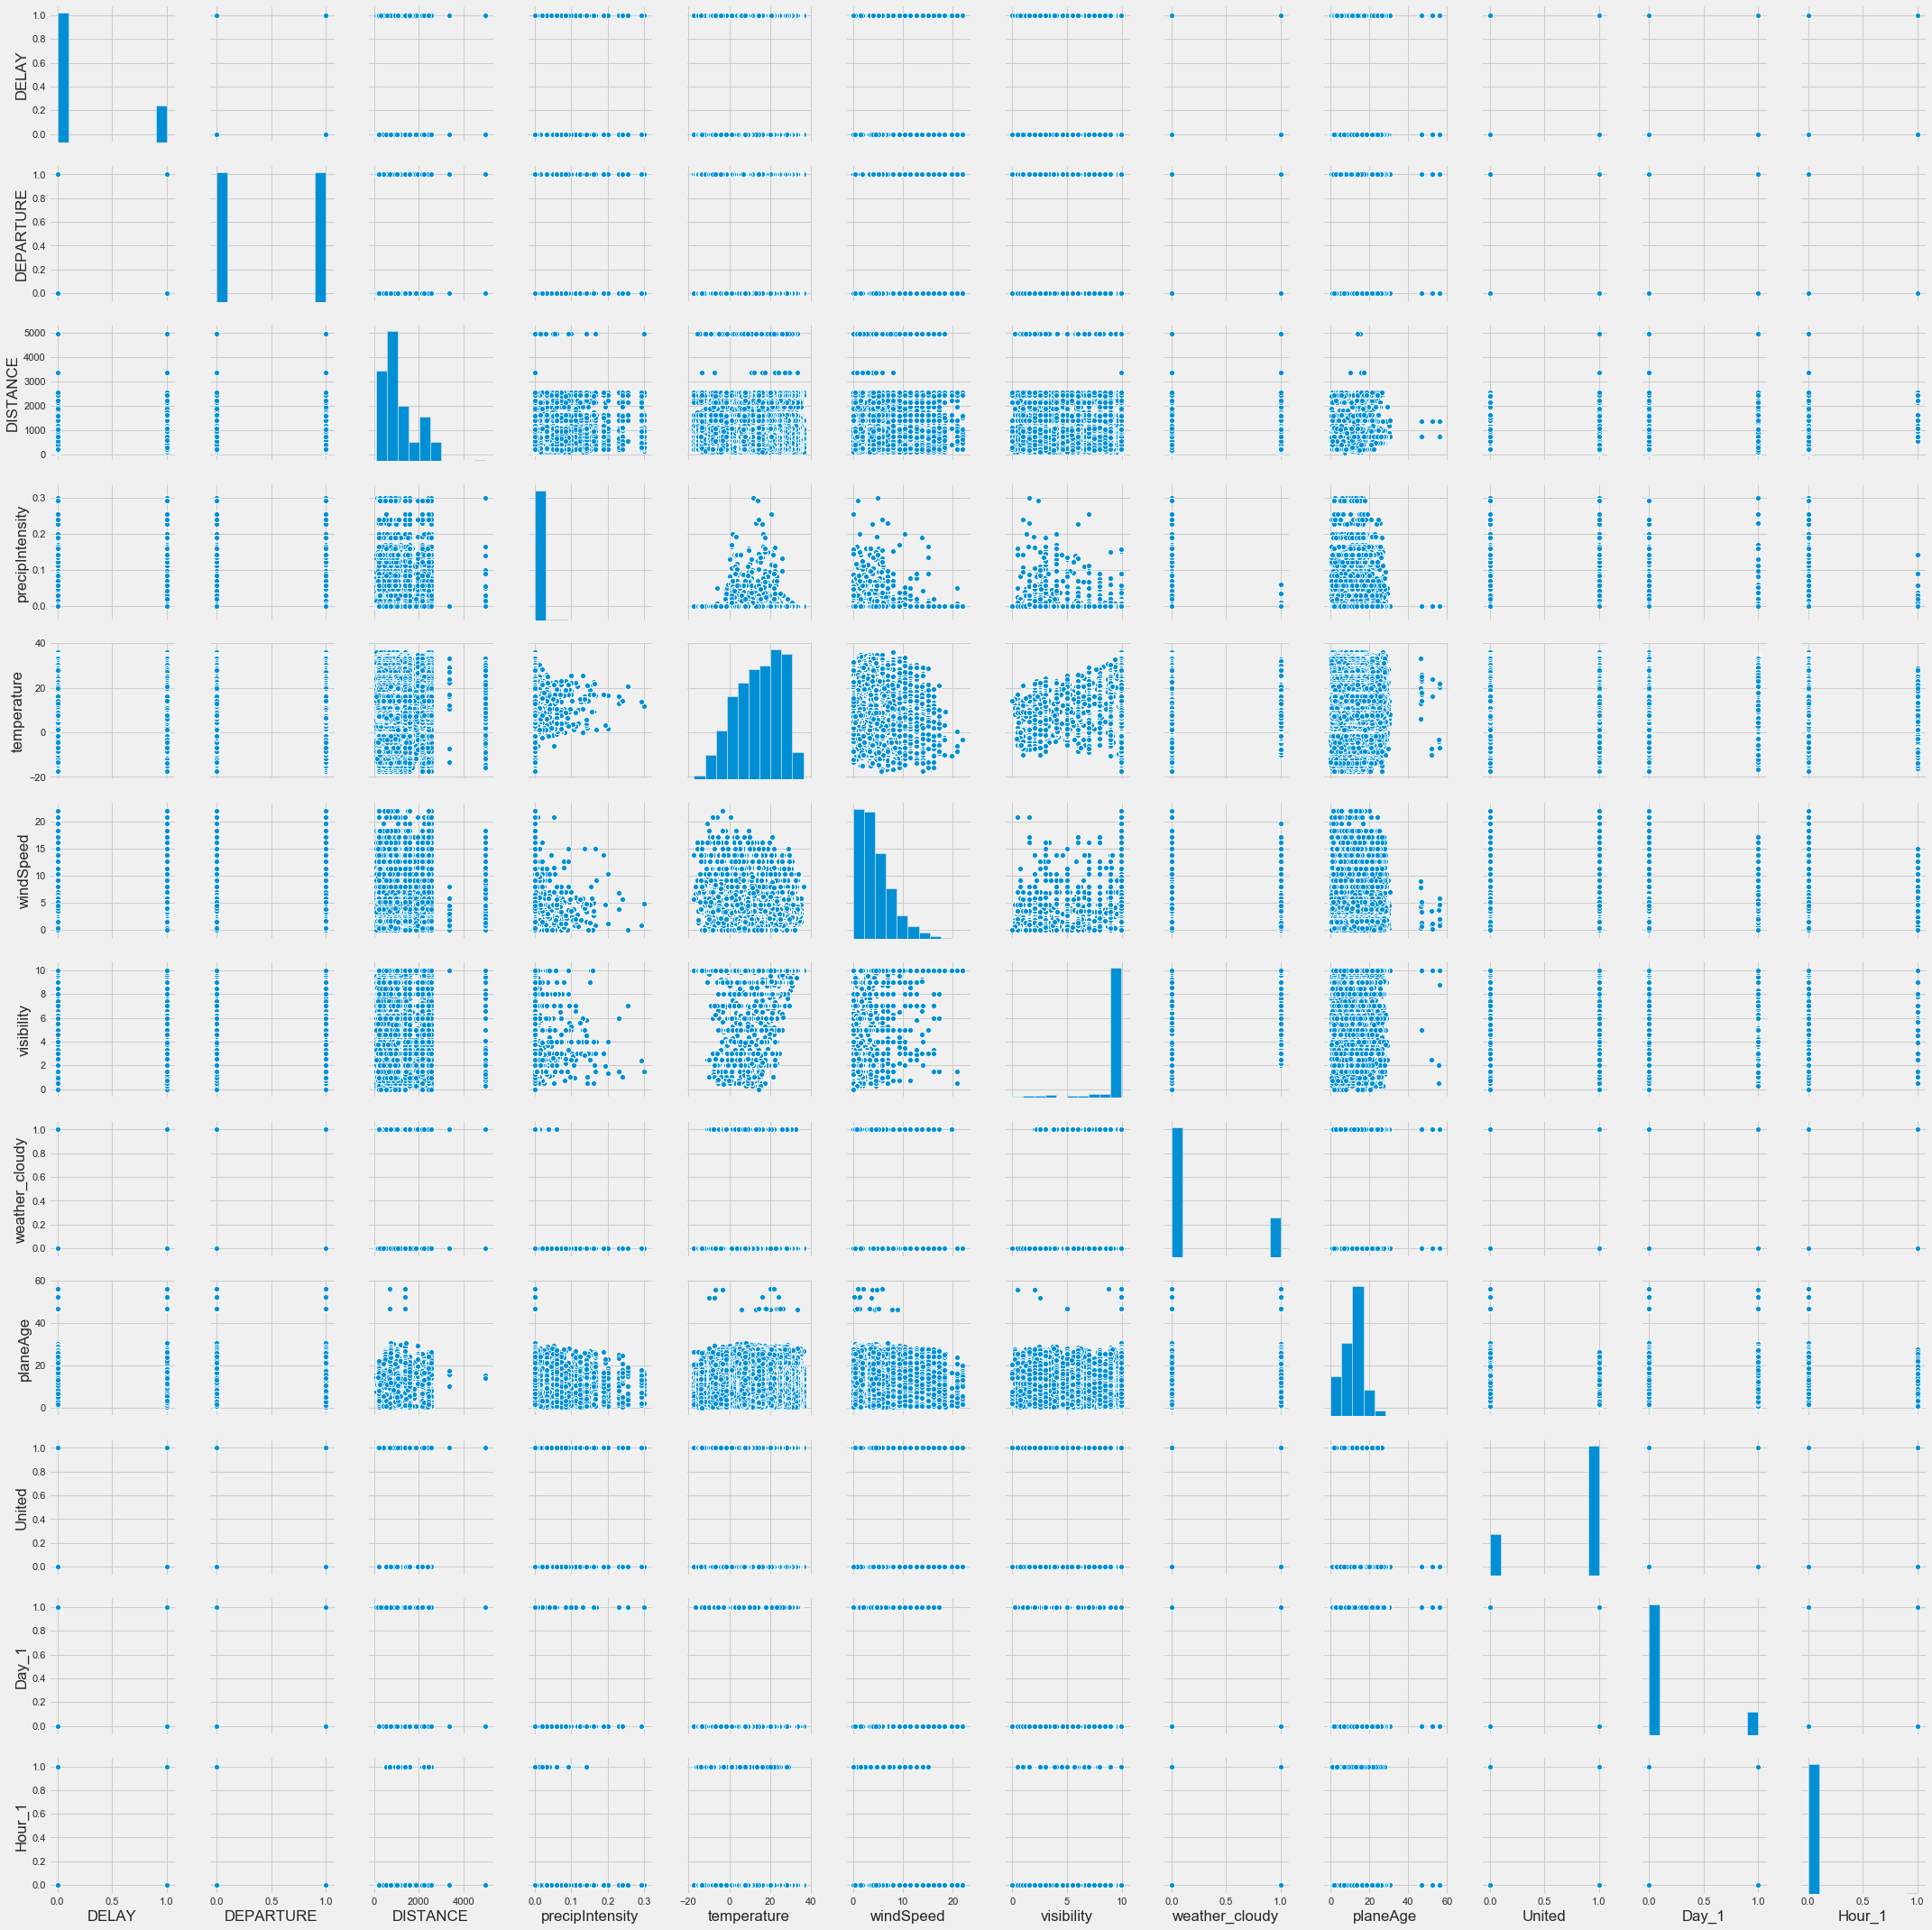

In [23]:
sns.pairplot(df[['DELAY','DEPARTURE','DISTANCE', 'precipIntensity', 'temperature', 'windSpeed', 'visibility',
                'weather_cloudy', 'planeAge', 'United', 'Day_1', 'Hour_1']])

### Class Imbalance

In [24]:
# checking for class imbalance
df["DELAY"].value_counts()

0    143655
1     41487
Name: DELAY, dtype: int64

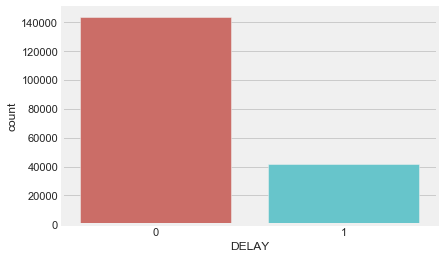

<Figure size 432x288 with 0 Axes>

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x="DELAY", data=df, palette="hls")
plt.show()
plt.savefig("count_plot")

In [26]:
count_no_delay = len(df[df["DELAY"] == 0])
count_delay = len(df[df["DELAY"] == 1])
per_of_no_delay = count_no_delay/(count_no_delay+count_delay)
print("percentage of no delay is", per_of_no_delay*100)
per_of_delay = count_delay/(count_no_delay+count_delay)
print("percentage of delay is", per_of_delay*100)

percentage of no delay is 77.59179440645558
percentage of delay is 22.408205593544412


Our classes are imbalanced, and the ratio of no-delay to delay instances is 77:22, we need to balance the classes. If this is not done, we may end up optimizing for a meaningless metric in the context of our use case.

In [21]:
# scaling the data and set target and features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df = scaler.fit_transform(df.drop('DELAY',axis=1))

X = scaled_df
y = df['DELAY'].as_matrix()

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.4, random_state=42)

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
# over-sampling with SMOTE
# only on the training set
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 19

### PCA

In [29]:
# PCA
from sklearn.decomposition import PCA
fit = PCA()
pca = fit.fit_transform(X_train)
pca

array([[-4.93634053e-01, -2.79942023e-01,  2.27647159e-01, ...,
        -7.24256429e-02,  4.49862300e-12,  5.57837316e-13],
       [-7.89288946e-01, -6.65086463e-02,  3.41612383e-02, ...,
        -1.56094354e-01, -1.17924944e-14,  2.20815752e-16],
       [-8.87308246e-01,  3.92591754e-01, -2.15728836e-01, ...,
         4.85406697e-01,  4.85016796e-14, -4.45617362e-15],
       ...,
       [-5.31958900e-01, -4.10506260e-01,  1.27272862e-01, ...,
        -8.00584555e-02,  5.74111744e-14, -1.82457473e-16],
       [-4.67816957e-01, -4.10651985e-01,  1.98790655e-01, ...,
        -5.89243750e-02,  5.70970521e-14, -5.10805046e-16],
       [-7.01834185e-01, -3.84961695e-01,  1.10153397e-01, ...,
         4.40065550e-01,  5.77677571e-14, -3.06008737e-16]])

In [30]:
# number of components used when we want to capture 90% of variance
pca = PCA(0.9)

In [31]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# the number of components we need to have 90% of variance
pca.n_components_

34

Text(0, 0.5, 'Variance Explained')

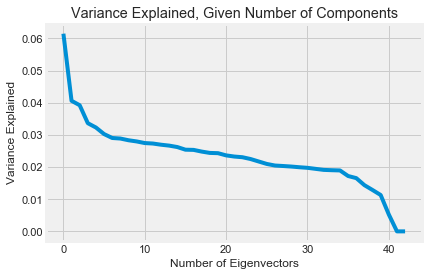

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [36]:
print(fit.explained_variance_ratio_)
print("--------------------")
print(fit.explained_variance_ratio_[:34].sum())
print("--------------------")
print("If we use ALL the data we can explain",fit.explained_variance_ratio_[:44].sum()*100," % of our data!")

[6.14400702e-02 4.05829662e-02 3.92112878e-02 3.36269976e-02
 3.22759738e-02 3.02406907e-02 2.90242764e-02 2.88536988e-02
 2.83212354e-02 2.79535691e-02 2.74480758e-02 2.73004363e-02
 2.69343489e-02 2.66529231e-02 2.62093614e-02 2.53865135e-02
 2.53249347e-02 2.47969744e-02 2.43836343e-02 2.43048004e-02
 2.36176485e-02 2.32600568e-02 2.30475269e-02 2.24897134e-02
 2.17215871e-02 2.09569534e-02 2.04677791e-02 2.03159622e-02
 2.01493698e-02 1.99353675e-02 1.97502839e-02 1.94305177e-02
 1.91093920e-02 1.90113790e-02 1.89385442e-02 1.72034746e-02
 1.65495825e-02 1.43644218e-02 1.28569970e-02 1.12997945e-02
 5.25087902e-03 7.65730148e-29 1.85828544e-31]
--------------------
0.9035363063552799
--------------------
If we use ALL the data we can explain 100.0  % of our data!


In [42]:
pca = PCA(n_components=34)
principalComponents = pca.fit_transform(X_train)
print(np.sum(pca.explained_variance_ratio_))

0.9035363063551237


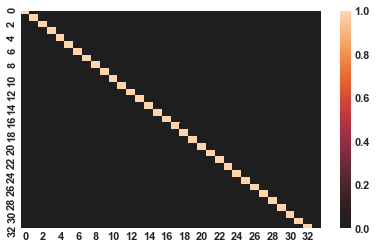

In [65]:
import seaborn as sns
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

ValueError: 'c' argument has 185142 elements, which is not acceptable for use with 'x' with size 172436, 'y' with size 172436.

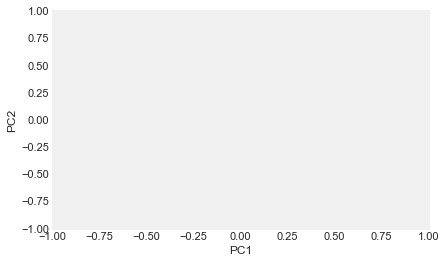

In [46]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))
# plt.show()

In [37]:
pca = pd.DataFrame(principalComponents)

In [38]:
pca.shape

(172436, 34)

In [40]:
pca.head()

0         1         2         3         4         5         6   \
0 -0.493634 -0.279942  0.227647  0.896739 -3.110337  1.972483  0.408467   
1 -0.789289 -0.066509  0.034161  0.634391 -0.744605 -1.151225 -0.588681   
2 -0.887308  0.392592 -0.215729  0.621217 -0.665562 -0.738921 -0.958359   
3 -0.620514 -0.301976  0.047497 -0.444954  0.273825  0.202268  0.019389   
4 -0.470436 -0.000426 -0.325608 -0.009731  0.300737  0.503053  0.379805   

         7         8         9   ...        24        25        26        27  \
0 -0.598388  0.979685 -1.188769  ... -0.121989 -0.134592 -0.195608 -0.341381   
1 -0.150151  0.664579  0.291294  ...  0.466301 -0.285401 -1.021301 -1.211463   
2 -1.209049  0.578316 -0.920537  ... -0.248418 -1.556127  1.331982  0.557774   
3  0.676985  0.368438  0.329236  ...  3.767683  0.236508  0.885918  1.293742   
4 -1.085860 -0.834118 -0.387238  ... -0.018571 -0.255026  0.347239 -0.144413   

         28        29        30        31        32        33  
0  0.469803  0.054225 -0.065690 -0.256917 -0.097906  0.270177  
1 -0.093949  0.488329  2.040636  3.773392  0.205209 -0.394892  
2 -0.230813 -0.008870  0.240450 -0.381452  0.040973 -0.982684  
3 -0.402704 -0.744413 -0.396313  0.083655  0.138947 -0.256162  
4  0.321874  0.391042  1.074011 -0.522455  0.689040  2.975552  

[5 rows x 34 columns]

### Baseline Model

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

#fit the model
logreg = LogisticRegression()
model_log = logreg.fit(pca, y_train)

#predict with model
pred_log = logreg.predict(pca)

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, pred_log)
roc_auc = auc(false_positive_rate,true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

TypeError: float() argument must be a string or a number, not 'PCA'

In [ ]:
from sklearn.model_selection import cross_val_score
# crossvalidation
log_cv_score = cross_val_score(logreg, pca, y_train, cv=3)
mean_log_cv_score = np.mean(log_cv_score)

print(f"Mean Cross Validation Score: {mean_log_cv_score :.2%}")

In [69]:
def conf_matrix(y_true, y_pred):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(y_true):
        pred = y_pred[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

conf_matrix(y_train, pred_log)

{'TP': 55677, 'TN': 52570, 'FP': 33648, 'FN': 30541}

In [70]:
from sklearn.metrics import confusion_matrix

# Print confusion matrix
cnf_matrix_log = confusion_matrix(y_train, pred_log)
print('Confusion Matrix:\n', cnf_matrix_log)

Confusion Matrix:
 [[52570 33648]
 [30541 55677]]


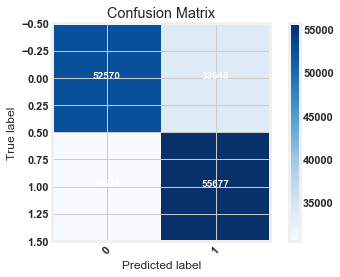

In [71]:
#plotting confusion matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

# Create the basic matrix
plt.imshow(cnf_matrix_log,  cmap=plt.cm.Blues) 

# Add title and axis labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate axis scales
class_names = set(y) # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
# plt.yticks(tick_marks, class_names)

# Add labels to each cell
thresh = cnf_matrix_log.max() / 2. # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization 
for i, j in itertools.product(range(cnf_matrix_log.shape[0]), range(cnf_matrix_log.shape[1])):
        plt.text(j, i, cnf_matrix_log[i, j],
                 horizontalalignment='center',
                 color='white' if cnf_matrix_log[i, j] > thresh else 'black')

# Add a legend
plt.colorbar()
plt.show()

In [72]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show()

In [74]:
# function to plot normalized confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    # Check if normalize is set to True
    # If so, normalize the raw confusion matrix before visualizing
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, cmap=cmap)
    
    # Add title and axis labels 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    # Add appropriate axis scales
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)
    
    # Text formatting
    fmt = '.2f' if normalize else 'd'
    # Add labels to each cell
    thresh = cm.max() / 2.
    # Here we iterate through the confusion matrix and append labels to our visualization 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    # Add a legend
    plt.colorbar()
    plt.show() 

Normalized confusion matrix
[[0.60973347 0.39026653]
 [0.35422998 0.64577002]]


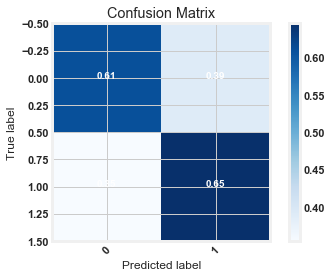

In [75]:
plot_confusion_matrix(cnf_matrix_log, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_train, pred_log))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     86218
           1       0.62      0.65      0.63     86218

    accuracy                           0.63    172436
   macro avg       0.63      0.63      0.63    172436
weighted avg       0.63      0.63      0.63    172436



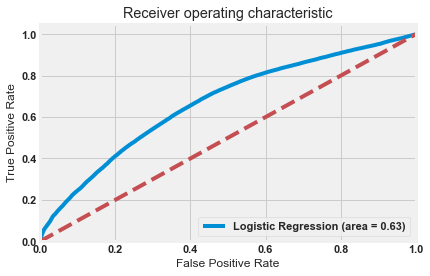

In [78]:
# ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_train, logreg.predict(pca))
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### KNN

In [79]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# # Fit the classifier
clf_knn.fit(pca, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
# Predict
pred_knn = clf_knn.predict(pca)

In [81]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_train, pred_knn)

Precision Score: 0.8013012465305067
Recall Score: 0.934213273330395
Accuracy Score: 0.8512781553735879
F1 Score: 0.8626678162335264


In [82]:
cnf_matrix_knn = confusion_matrix(y_train, pred_knn)
print('Confusion Matrix:\n', cnf_matrix_knn)

Confusion Matrix:
 [[66245 19973]
 [ 5672 80546]]


Normalized confusion matrix
[[0.76834304 0.23165696]
 [0.06578673 0.93421327]]


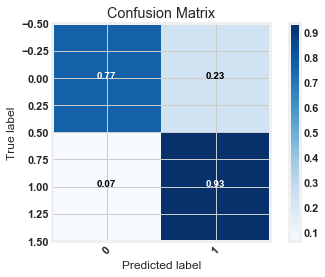

In [83]:
plot_confusion_matrix(cnf_matrix_knn, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

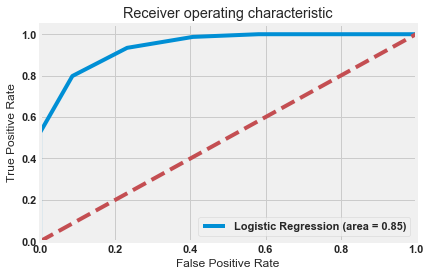

In [85]:
knn_roc_auc = roc_auc_score(y_train, pred_knn)
fpr, tpr, thresholds = roc_curve(y_train, clf_knn.predict_proba(pca)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# crossvalidation
knn_cv_score = cross_val_score(clf_knn, pca, y_train, cv=3)
mean_knn_cv_score = np.mean(knn_cv_score)

print(f"Mean Cross Validation Score: {mean_knn_cv_score :.2%}")

In [89]:
# find the best k
def find_best_k(pca, y_train, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(pca, y_train)
        preds_k = knn.predict(pca)
        f1 = f1_score(y_test, preds_k)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [90]:
find_best_k(pca, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [74057, 172436]

In [94]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(pca, y_train)  #fit the model
    pred=model.predict(pca) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

ValueError: Found input variables with inconsistent numbers of samples: [74057, 172436]

###### Decision Tree and Random Forest

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
        
models=[RandomForestClassifier(), DecisionTreeClassifier()]
model_names=['RandomForestClassifier','DecisionTree']

acc = []
d = {}

for model in range(len(models)):
    clf = models[model]
    clf.fit(pca, y_train)
    pred_tree = clf.predict(pca)
    acc.append(accuracy_score(pred_tree, y_train))
     
d = {'Models':model_names,'Accuracy':acc}

In [98]:
# put acc into a DF
acc_frame = pd.DataFrame(d)
acc_frame

Models  Accuracy
0  RandomForestClassifier       1.0
1            DecisionTree       1.0

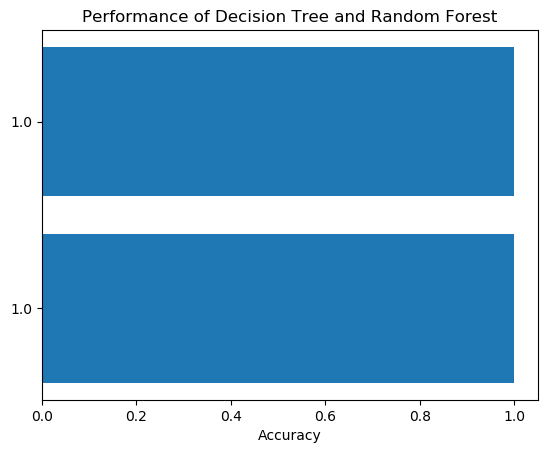

In [99]:
# plot acc
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(model_names, acc, align='center')
ax.set_yticks(model_names)
ax.set_yticklabels(acc)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Accuracy')
ax.set_title('Performance of Decision Tree and Random Forest')

plt.show()

In [121]:
clf = RandomForestClassifier(random_state=123)
clf.fit(pca, y_train)
pred_tree = clf.predict(pca)

In [122]:
print_metrics(y_train, pred_tree)

Precision Score: 0.999976803525864
Recall Score: 1.0
Accuracy Score: 0.9999884014938876
F1 Score: 0.9999884016284114


In [125]:
from sklearn.model_selection import cross_val_score
# crossvalidation
rf_cv_score = cross_val_score(clf, pca, y_train, cv=3)
mean_rf_cv_score = np.mean(rf_cv_score)

print(f"Mean Cross Validation Score: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score: 82.09%


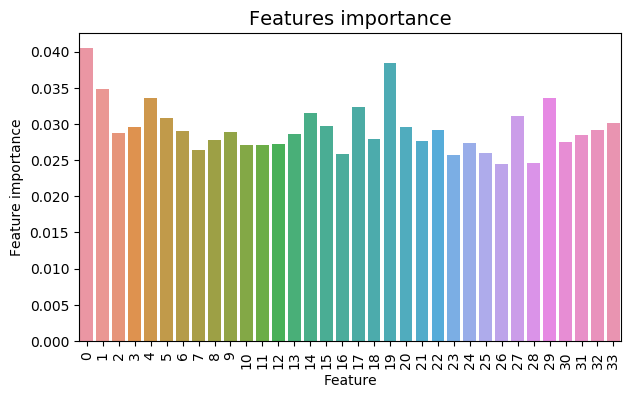

In [123]:
# feature importance
df3 = pd.DataFrame.from_records(pca)     
tmp = pd.DataFrame({'Feature': df3.columns, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
# hyperparameter tuning
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}
rf_grid_search = GridSearchCV(clf, rf_param_grid, cv=3)
rf_grid_search.fit(pca, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(pca, y_train)